<a href="https://colab.research.google.com/github/tariqzia5/ML_Credit-Card-Acquisition-model/blob/main/Credit_Card_Acquisition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**
Data Link https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

# About Dataset

A Credit Card Dataset for Machine Learning!

# Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Credit score cards are based on historical data.Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
Predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. 

# Task

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. 

# **IMPORTING THE LIBRARIES AND DATASET**

In [6]:
#Importing basic packages
import pandas as pd
import numpy as np

# For Graphs
import matplotlib.pyplot as plt 
import seaborn as sns
# For beautification of charts
from seaborn.widgets import color_palette
# For SIZE of charts
sns.set(rc={'figure.figsize':(15,6)})

# For Logistic Regression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
# For Train data & Test data split
from sklearn.model_selection import train_test_split

Loading the RAW data to Python Enviromnment for further processing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#Loading the data files from Google Drive
APPLICATION_RECORD = pd.read_csv("/content/drive/MyDrive/ML_Raw_File/Credit Card Acquisition model/application_record.csv")
CREDIT_RECORD = pd.read_csv("/content/drive/MyDrive/ML_Raw_File/Credit Card Acquisition model/credit_record.csv")

# **BASIC DETAILS**

In [13]:
# Number of Rows & Columns
# SHAPE & PREVIEW
print('APPLICATION_RECORD shape is:',APPLICATION_RECORD.shape) #--(438557, 18)
print(APPLICATION_RECORD.head())
print('CREDIT_RECORD shape is:',CREDIT_RECORD.shape) #--(1048575, 3)
print(CREDIT_RECORD.head())

APPLICATION_RECORD shape is: (438557, 18)
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civi

Checking for Null Values and Suspicious Records

In [14]:
APPLICATION_RECORD.columns.values
APPLICATION_RECORD.info()
#OCCUPATION_TYPE has missing records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [15]:
CREDIT_RECORD.columns.values
CREDIT_RECORD.info()
#no missing records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Checking the relationship between two tables using the ID variable

In [ ]:
CREDIT_RECORD
#45985 Records
APPLICATION_RECORD
#438510 Records
print('Unique ID in CREDIT_RECORD:',len(CREDIT_RECORD['ID'].unique()))
print('Unique ID in APPLICATION_RECORD:',len(APPLICATION_RECORD['ID'].unique()))
#NOTE TO SELF-unique gives the array of unique records, nunique gives the count
#SAME thing can be done by using len and also nunique
print('Unique ID in CREDIT_RECORD:',CREDIT_RECORD['ID'].nunique())
print('Unique ID in APPLICATION_RECORD:',APPLICATION_RECORD['ID'].nunique() )

Unique ID in CREDIT_RECORD: 45985
Unique ID in APPLICATION_RECORD: 438510
Unique ID in CREDIT_RECORD: 45985
Unique ID in APPLICATION_RECORD: 438510


# **DATA EXPLORATION AND VALIDATION**

## **CATEGORICAL/DISCRETE FILEDS**
********************
********************

#### **APPLICATION_RECORD**

======================
*   ID-DISCRETE
*   CNT_CHILDREN-DISCRETE
*   CNT_FAM_MEMBERS-DISCRETE
*   CODE_GENDER-CATEGORICAL
*   FLAG_OWN_CAR-CATEGORICAL
*   FLAG_OWN_REALTY-CATEGORICAL
*   NAME_INCOME_TYPE-CATEGORICAL
*   NAME_EDUCATION_TYPE-CATEGORICAL
*   NAME_FAMILY_STATUS-CATEGORICAL
*   NAME_HOUSING_TYPE-CATEGORICAL
*   FLAG_MOBIL-CATEGORICAL
*   FLAG_WORK_PHONE-CATEGORICAL
*   FLAG_PHONE-CATEGORICAL
*   NFLAG_EMAIL-CATEGORICAL
*   OCCUPATION_TYPE-CATEGORICAL
***************




#### **CREDIT_RECORD**

================
*   ID-DISCRETE
*   STATUS-DISCRETE
******



## **CONTINUOUS FILEDS**
********************
********************

#### **APPLICATION_RECORD**

==================


*   AMT_INCOME_TOTAL-CONTINUOUS
*   DAYS_BIRTH-CONTINUOUS
*   DAYS_EMPLOYED-CONTINUOUS
***************



#### **CREDIT_RECORD**

================

*   MONTHS_BALANCE-CONTINUOUS
******

### **CATEGORICAL/DISCRETE FIELD**


#### APPLICATION_RECORD['ID']-Discrete Field 

This denotes the client number.

In [ ]:
# APPLICATION_RECORD['ID']-Discrete Field 
# ID HAS 438510 UNIQUE Records ,47 Records are duplicate having only one extra record
# GOOD THING IS THESE 47 RECORDS ARE NOT PRESENT IN THE CREDIT_RECORD TABLE

ID_COUNT=APPLICATION_RECORD.groupby(['ID']).agg({'ID':'count'})
DUPLICATE_ID=ID_COUNT[ID_COUNT['ID']>1]
len(DUPLICATE_ID)  #47 Reocrds are duplicate

#Checking few record
APPLICATION_RECORD[APPLICATION_RECORD['ID']==7022197] #Male & Female
APPLICATION_RECORD[APPLICATION_RECORD['ID']==7207977] #Female & Female ,OCCUPATION_TYPE is not there when pensioner, then started working
APPLICATION_RECORD[APPLICATION_RECORD['ID']==7036518] #Female & Female ,
APPLICATION_RECORD[APPLICATION_RECORD['ID']==7089090] #Female & Female,NAME_INCOME_TYPE is diff,AMT_INCOME_TOTAL is diff,DAYS_BIRTH is diff
DUP_ID=APPLICATION_RECORD[APPLICATION_RECORD['ID'].duplicated()==True]['ID'].unique()
DUP_ID

array([7602432, 7052783, 7838075, 7053557, 7023651, 7213374, 7089090,
       7576316, 7023108, 7137299, 7836711, 7022197, 7636389, 7207977,
       7045794, 7154819, 7836971, 7416167, 7702238, 7155150, 7317997,
       7036518, 7772847, 7243768, 7743418, 7090931, 7603224, 7833087,
       7742298, 7050948, 7174719, 7744386, 7052812, 7022327, 7154598,
       7046068, 7045885, 7636756, 7702516, 7099881, 7372589, 7024111,
       7282535, 7742853, 7135270, 7091721, 7618285])

In [ ]:

APPLICATION_RECORD[APPLICATION_RECORD['ID'].isin ([7602432, 7052783, 7838075, 7053557, 7023651, 7213374, 7089090,
       7576316, 7023108, 7137299, 7836711, 7022197, 7636389, 7207977,
       7045794, 7154819, 7836971, 7416167, 7702238, 7155150, 7317997,
       7036518, 7772847, 7243768, 7743418, 7090931, 7603224, 7833087,
       7742298, 7050948, 7174719, 7744386, 7052812, 7022327, 7154598,
       7046068, 7045885, 7636756, 7702516, 7099881, 7372589, 7024111,
       7282535, 7742853, 7135270, 7091721, 7618285])]

CREDIT_RECORD[CREDIT_RECORD['ID'].isin ([7602432, 7052783, 7838075, 7053557, 7023651, 7213374, 7089090,
       7576316, 7023108, 7137299, 7836711, 7022197, 7636389, 7207977,
       7045794, 7154819, 7836971, 7416167, 7702238, 7155150, 7317997,
       7036518, 7772847, 7243768, 7743418, 7090931, 7603224, 7833087,
       7742298, 7050948, 7174719, 7744386, 7052812, 7022327, 7154598,
       7046068, 7045885, 7636756, 7702516, 7099881, 7372589, 7024111,
       7282535, 7742853, 7135270, 7091721, 7618285])]

,ID,MONTHS_BALANCE,STATUS


#### APPLICATION_RECORD['CNT_CHILDREN']-Discrete Field

This denotes the number of children the client has.

In [ ]:
# APPLICATION_RECORD['CNT_CHILDREN']-Discrete Field
# 99.9% Records are correct, Only .1% Record has issues where children count is 19
# 5105054--SINGLE/NOTMARRIED BUT HAVING 19 CHILDRENS, MAY BE A DEFAULT VALUE.Rest all values where children are >10 are either married or separated.
# Issue with one record
# IMPUTATION BASED ON MEDIAN
# 8 Records out of 438557 have children more than 10.
# For records having count of children less than 10, mean is .427150,median is 0
# For entire dataset of children count mean is .427390 and median is 0
# So it will not make any great impact
# Hence no cleaning required

print(APPLICATION_RECORD['CNT_CHILDREN'].value_counts())

#Testing what happens when we apply percentile on Discrete
util_percentiles=APPLICATION_RECORD['CNT_CHILDREN'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,.999,1])
round(util_percentiles,2)
APPLICATION_RECORD[APPLICATION_RECORD['CNT_CHILDREN']>10]
APPLICATION_RECORD[APPLICATION_RECORD['NAME_FAMILY_STATUS']=='Single / not married']['CNT_CHILDREN'].unique()
APPLICATION_RECORD[APPLICATION_RECORD['CNT_CHILDREN']>10]['NAME_FAMILY_STATUS'].value_counts()
APPLICATION_RECORD[APPLICATION_RECORD['CNT_CHILDREN']>10]['CNT_CHILDREN'].describe()
APPLICATION_RECORD[APPLICATION_RECORD['CNT_CHILDREN']<=10]['CNT_CHILDREN'].describe()
APPLICATION_RECORD['CNT_CHILDREN'].describe()
APPLICATION_RECORD['CNT_CHILDREN'].median()

0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64


0.0

#### APPLICATION_RECORD['CNT_FAM_MEMBERS']-Discrete Field

This denotes the family size of the client.

In [ ]:
# APPLICATION_RECORD['CNT_FAM_MEMBERS']-Discrete Field
# EVERY RECORD HAS FAMILY MEMBERS, MIN FAMILY MEMBERS ARE 2
# 5105054-SINGLE/NOTMARRIED BUT HAVING 20 FAMILY MEMBERS, MAY BE A DEFAULT VALUE.Rest all values where family members are >10 are either married or separated or civil marriage etc.
# IMPUTATION BASED ON MEDIAN
# 13 Records out of 438557 have Family more than 10.
# For records having count of Family less than 10, mean is 2.194129 median is 2
# So it will not make any great impact
# Hence no cleaning required

print(APPLICATION_RECORD['CNT_FAM_MEMBERS'].value_counts())
APPLICATION_RECORD[APPLICATION_RECORD['CNT_FAM_MEMBERS']>19]
APPLICATION_RECORD[APPLICATION_RECORD['CNT_FAM_MEMBERS']>10]
APPLICATION_RECORD[APPLICATION_RECORD['NAME_FAMILY_STATUS']=='Single / not married']['CNT_FAM_MEMBERS'].unique()
APPLICATION_RECORD[APPLICATION_RECORD['CNT_FAM_MEMBERS']>10]['NAME_FAMILY_STATUS'].value_counts()
APPLICATION_RECORD[APPLICATION_RECORD['CNT_FAM_MEMBERS']>10]['CNT_FAM_MEMBERS'].describe()
APPLICATION_RECORD[APPLICATION_RECORD['CNT_FAM_MEMBERS']>=10]['CNT_FAM_MEMBERS'].describe()
APPLICATION_RECORD[APPLICATION_RECORD['CNT_FAM_MEMBERS']<=10]['CNT_FAM_MEMBERS'].describe()
APPLICATION_RECORD['CNT_FAM_MEMBERS'].describe()


2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64


count    438557.000000
mean          2.194465
std           0.897207
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

#### CREDIT_RECORD['ID']-Discrete Field 

This denotes the client number like we have in APPLICATION_RECORD

In [ ]:
# CREDIT_RECORD['ID']-Discrete Field 
# ID HAS 1048575 Records ,45985 IDs are unique

ID_COUNT=CREDIT_RECORD.groupby(['ID']).agg({'ID':'count'})
len(CREDIT_RECORD['ID'].unique())

45985

#### CREDIT_RECORD['STATUS']-Discrete Field 

This denotes the status of credit account of the customer for various months depending on whether he is paying on time or delaying. The following are the status depending on the payment of debt.


*   0: 1-29 days past due 
*   1: 30-59 days past due 
*   2: 60-89 days overdue 
*   3: 90-119 days overdue 
*   4: 120-149 days overdue 
*   5: Overdue or bad debts, write-offs for more than 150 days 
*   C: paid off that month 
*   X: No loan for the month

In [ ]:
# CREDIT_RECORD['STATUS']-Discrete Field 
# ID HAS 1048575 Records ,45985 IDs Records are unique
# All records are present
CREDIT_RECORD['STATUS'].value_counts()


C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

#### APPLICATION_RECORD['CODE_GENDER']-Categorical Fiels

This denotes the sex of the customer

*   M-Male
*   F-Female



F    294440
M    144117
Name: CODE_GENDER, dtype: int64


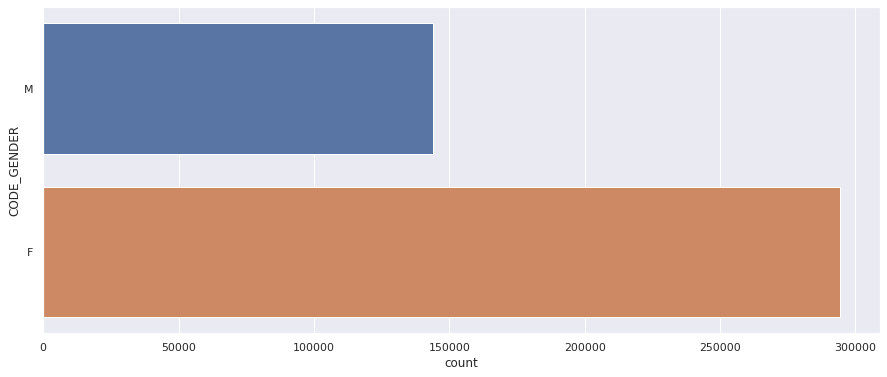

In [ ]:
from seaborn.widgets import color_palette
# APPLICATION_RECORD['CODE_GENDER']-Categorical Fiels
# No Outliers Found
# No Records Missing
# Takes the value M,F
# Ratio of M:F is almost=1:2
# Need to replace M,F with 1,0 for predictive modelling
#1-M,0-F

print(APPLICATION_RECORD['CODE_GENDER'].value_counts())
#NOTE TO SELF--TO CHANGE COLOR PALETTE, USE THIS
#sns.countplot(y="CODE_GENDER",  data=APPLICATION_RECORD,palette=['#432371',"#FAAE7B"])
#sns.countplot(y="CODE_GENDER",  data=APPLICATION_RECORD,palette=['magenta',"purple"])
sns.countplot(y="CODE_GENDER",  data=APPLICATION_RECORD)

####APPLICATION_RECORD['FLAG_OWN_CAR']-Categorical Fiels

This denotes whether the client owns a car or not

*   Y-Yes
*   N-No



N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64


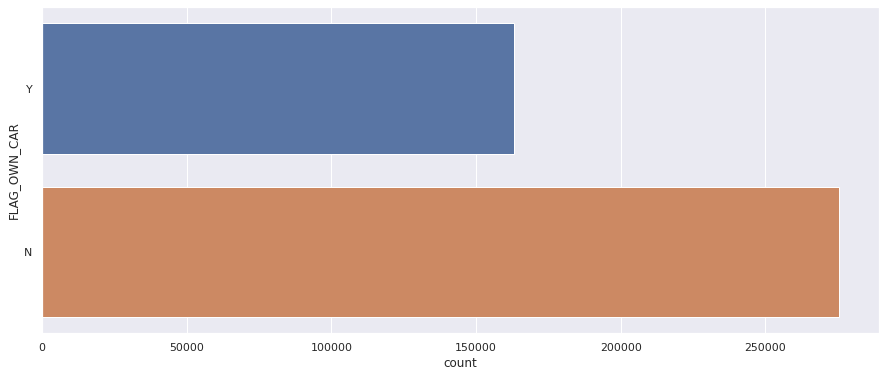

In [ ]:
# APPLICATION_RECORD['FLAG_OWN_CAR']-Categorical Fiels
# No Outliers Found
# No Records Missing
# Takes the value Y,N
# Need to replace Y,N with 1,0 for predictive modelling
#1-Y,0-N
print(APPLICATION_RECORD['FLAG_OWN_CAR'].value_counts())
sns.countplot(y="FLAG_OWN_CAR",  data=APPLICATION_RECORD)

####APPLICATION_RECORD[FLAG_OWN_REALTY']-Categorical Fiels

This denotes whether the client owns a car or not

*   Y-Yes
*   N-No



Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64


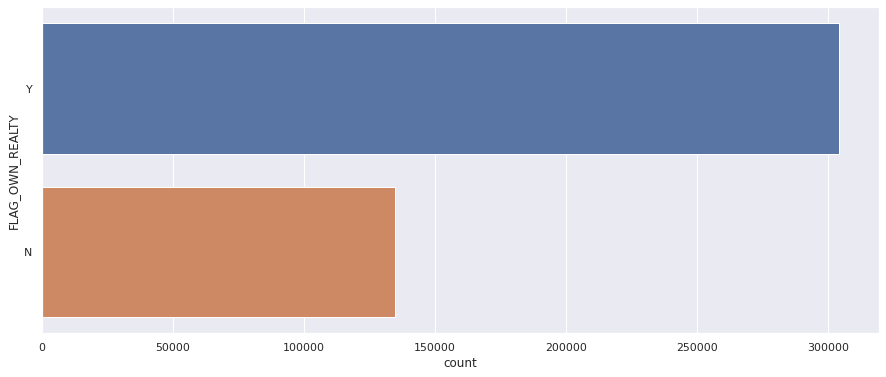

In [ ]:
# APPLICATION_RECORD[FLAG_OWN_REALTY']-Categorical Fiels
# No Outliers Found
# No Records Missing
# Takes the value Y,N
# Ratio of Y:N is almost 2:1
# Need to replace Y,N with 1,0 for predictive modelling
#1-Y,0-N
print(APPLICATION_RECORD['FLAG_OWN_REALTY'].value_counts())
sns.countplot(y="FLAG_OWN_REALTY",  data=APPLICATION_RECORD)

####APPLICATION_RECORD['NAME_INCOME_TYPE']-Categorical Field

This denotes under which income category does the client falls.

*   Working
*   Commercial associate
*   Pensioner
*   State servant
*   Student



Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
1464,5010456,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1465,5010457,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1466,5010458,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1467,5010459,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1468,5010460,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1469,5010461,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1470,5010462,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
1471,5010463,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0
6220,5025088,M,N,N,0,135000.0,Student,Higher education,Single / not married,With parents,-9115,-581,1,0,0,1,NaN,1.0
6221,6063169,M,N,N,0,135000.0,Student,Higher education,Single / not married,With parents,-9115,-581,1,0,0,1,NaN,1.0


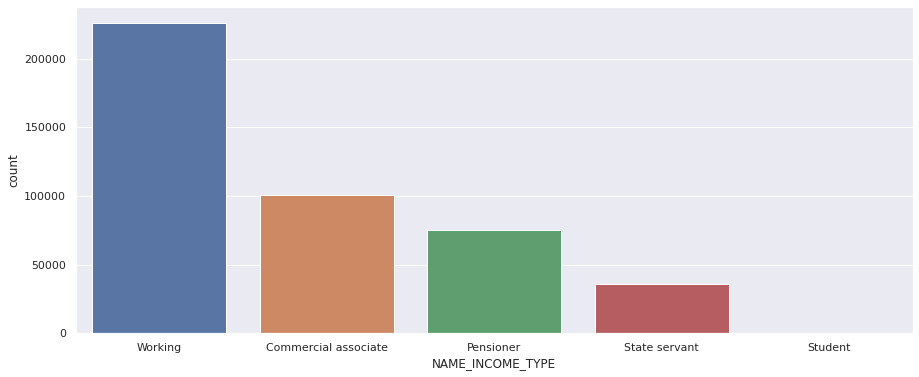

In [ ]:
# APPLICATION_RECORD['NAME_INCOME_TYPE']-Categorical Field
# Takes 5 Values-'Working','Commercial associate','Pensioner','State servant','Student'
# Data seems fine,no missing value, distribution as per discrete values looks normal
# Students are there who have annual income.It may be because of Stipend
print(APPLICATION_RECORD['NAME_INCOME_TYPE'].value_counts())
sns.countplot(x="NAME_INCOME_TYPE",  data=APPLICATION_RECORD)
APPLICATION_RECORD[APPLICATION_RECORD['NAME_INCOME_TYPE']=='Student']

####APPLICATION_RECORD['NAME_EDUCATION_TYPE']-Categorical Field

It denotes the education level of the client.


*   Secondary / secondary special
*   Higher education
*   Incomplete higher
*   Lower secondary
*   Academic degree



Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64


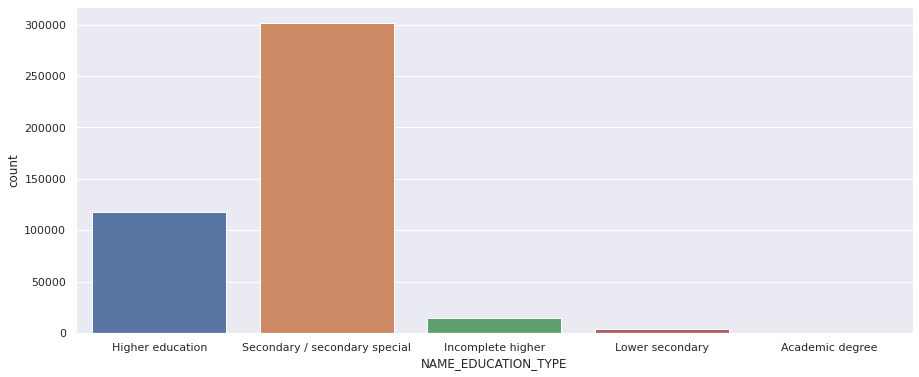

In [ ]:
# APPLICATION_RECORD['NAME_EDUCATION_TYPE']-Categorical Field
# Takes 5 Values-'Secondary / secondary special','Higher education','Incomplete higher','Lower secondary','Academic degree'
# Data seems fine,no missing value, distribution as per discrete values looks normal
#NOTE TO SELF-THIS IS TO CHANGE THE SIZE AS PICTURE WAS COMING CLUMSY
#sns.set(rc={'figure.figsize':(15,8)}) 
print(APPLICATION_RECORD['NAME_EDUCATION_TYPE'].value_counts())
sns.countplot(x="NAME_EDUCATION_TYPE",  data=APPLICATION_RECORD)

####APPLICATION_RECORD['NAME_FAMILY_STATUS']-Categorical Field

This denotes the marital status of the client


*   Married
*   Single / not married
*   Civil marriage
*   Separated
*   Widow



Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64


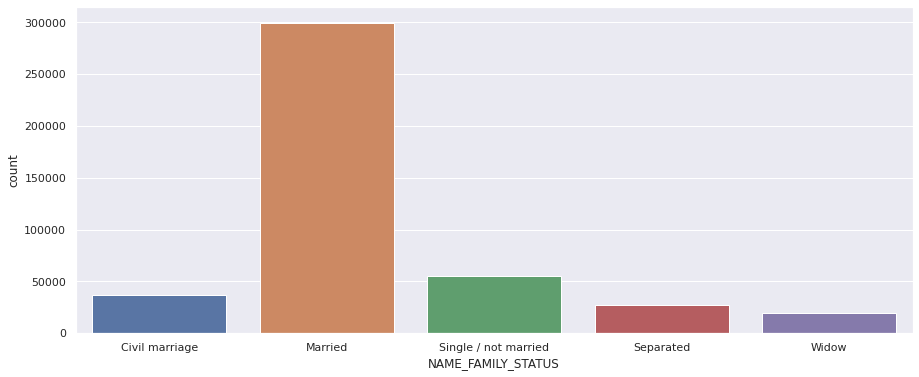

In [ ]:
# APPLICATION_RECORD['NAME_FAMILY_STATUS']-Categorical Field
# Takes 5 Values-'Married','Single / not married','Civil marriage','Separated','Widow'
# Data seems fine,no missing value, distribution as per discrete values looks normal
print(APPLICATION_RECORD['NAME_FAMILY_STATUS'].value_counts())
sns.countplot(x="NAME_FAMILY_STATUS",  data=APPLICATION_RECORD)

####APPLICATION_RECORD['NAME_HOUSING_TYPE']-Categorical Field

This denotes the way of living of the client

*   House / apartment
*   With parents
*   Municipal apartment
*   Rented apartment
*   Office apartment
*   Co-op apartment

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64


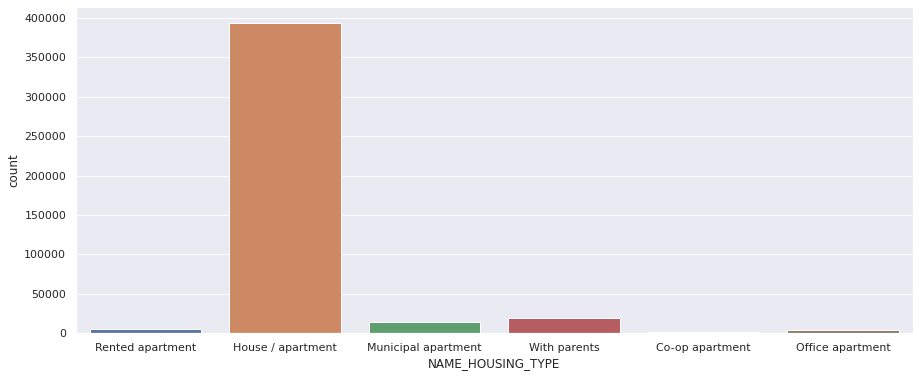

In [ ]:
# APPLICATION_RECORD['NAME_HOUSING_TYPE']-Categorical Field
# Takes 6 Values-'House / apartment','With parents','Municipal apartment','Rented apartment','Office apartment','Co-op apartment'
# Data seems fine,no missing value, distribution as per discrete values looks normal
print(APPLICATION_RECORD['NAME_HOUSING_TYPE'].value_counts())
sns.countplot(x="NAME_HOUSING_TYPE",  data=APPLICATION_RECORD)

####APPLICATION_RECORD['FLAG_MOBIL']-Categorical Field

This denotes whether the client owns a mobile phone or not.
*   1-Owns Mobile
*   0-Does not own a mobile.

1    438557
Name: FLAG_MOBIL, dtype: int64


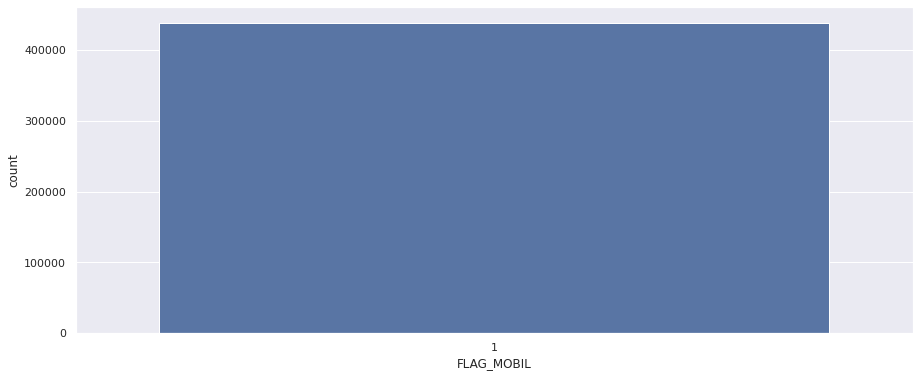

In [ ]:
# APPLICATION_RECORD['FLAG_MOBIL']-Categorical Field
# Takes 2 Values-1,0
# Data seems fine,no missing value
# All records have FLAG_MOBIL as 1 which is quite natural looking at present day world scenario
# We aill drop this column while building the model as it is a SINGULAR MATRIX
# A singular matrix when fed to few of the Logistic Regression package like (Logit) gives error and also it doesnot help the model to learn anything.
print(APPLICATION_RECORD['FLAG_MOBIL'].value_counts())
# sns.set(rc={'figure.figsize':(3,4)})
sns.countplot(x="FLAG_MOBIL",  data=APPLICATION_RECORD)

####APPLICATION_RECORD['FLAG_WORK_PHONE']-Categorical Field

This denotes whether the client have a work phone or not.

*   1-Having a work phone
*   0-Does not have a work phone



0    348156
1     90401
Name: FLAG_WORK_PHONE, dtype: int64


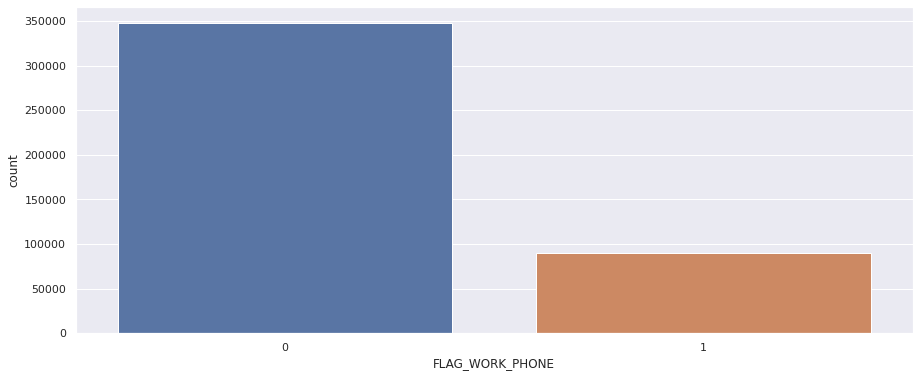

In [ ]:
# APPLICATION_RECORD['FLAG_WORK_PHONE']-Categorical Field
# Takes 2 Values-1,0
# Data seems fine,no missing value
# Date distribution is in the ratio close to 1:3.5/4 which looks fine considering the flag is for Work Phone
# 1-For having work phone,0 for not having work phone
#sns.set(rc={'figure.figsize':(15,6)})
print(APPLICATION_RECORD['FLAG_WORK_PHONE'].value_counts())
sns.countplot(x="FLAG_WORK_PHONE",  data=APPLICATION_RECORD)

####APPLICATION_RECORD['FLAG_PHONE']-Categorical Field
This denotes whether the client owns a land phone or not.

*   1-Have a phone
*   0-Do not have a phone



0    312353
1    126204
Name: FLAG_PHONE, dtype: int64


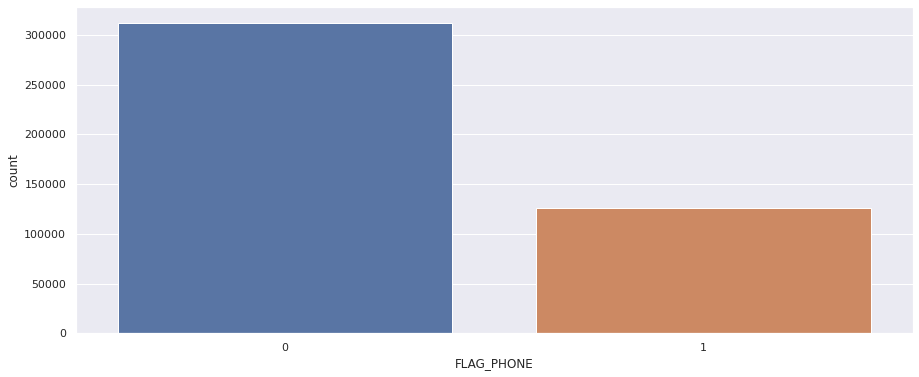

In [ ]:
# APPLICATION_RECORD['FLAG_PHONE']-Categorical Field
# Takes 2 Values-1,0
# Data seems fine,no missing value
# Date distribution is in the ratio close to 1:2.5 which looks fine considering the flag is for Phone
# 1-For having phone,0 for not having phone
print(APPLICATION_RECORD['FLAG_PHONE'].value_counts())
sns.countplot(x="FLAG_PHONE",  data=APPLICATION_RECORD)

####APPLICATION_RECORD['FLAG_EMAIL']-Categorical Field

This denotes whether the client has email or not

*   1-Have Email
*   0-Do Not Have Email



0    391102
1     47455
Name: FLAG_EMAIL, dtype: int64
0.12133663341021013


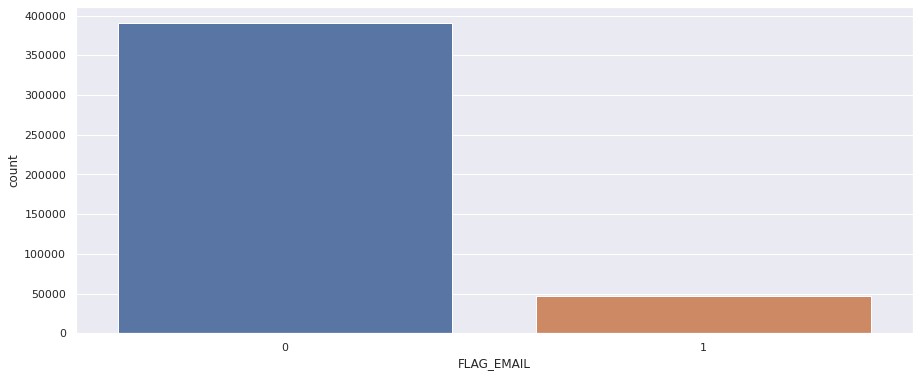

In [ ]:
# APPLICATION_RECORD['FLAG_EMAIL']-Categorical Field
# Takes 2 Values-1,0
# Data seems fine,no missing value
# Only 12 % of records hold an e-mail, rest does not have email which looks suspicious. May be the data is not entered so it is taking 0
# 1-For having email,0 for not having email
print(APPLICATION_RECORD['FLAG_EMAIL'].value_counts())
sns.countplot(x="FLAG_EMAIL",  data=APPLICATION_RECORD)

print(len(APPLICATION_RECORD['FLAG_EMAIL'][APPLICATION_RECORD['FLAG_EMAIL']==1])/len(APPLICATION_RECORD['FLAG_EMAIL'][APPLICATION_RECORD['FLAG_EMAIL']==0]))

####APPLICATION_RECORD['OCCUPATION_TYPE']-Categorical Field

It denotes in which type of occupation,the client is involved in.

*   Laborers             
*   Core staff           
*   Sales staff          
*   Managers             
*   Drivers              
*   High skill tech staff
*   Accountants          
*   Medicine staff       
*   Cooking staff        
*   Security staff       
*   Cleaning staff       
*   Private service staff
*   Low-skill Laborers   
*   Secretaries          
*   Waiters/barmen staff 
*   Realty agents        
*   HR staff             
*   IT staff             




Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64


0.44094376942639163

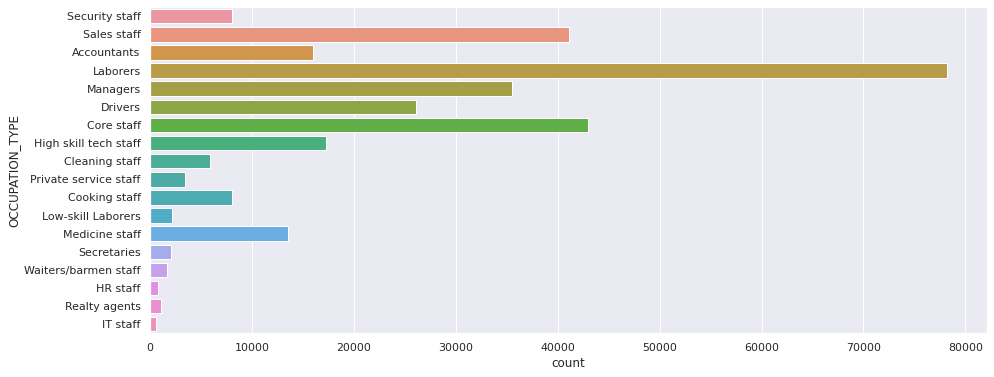

In [ ]:
# APPLICATION_RECORD['OCCUPATION_TYPE']-Categorical Field
# Takes 18 Discrete Values like Laborers,Core staff etc
# Data has missing records
# 134203 records are null,304354 records present
# 44% of Data is null
print(APPLICATION_RECORD['OCCUPATION_TYPE'].value_counts())
sns.countplot(y="OCCUPATION_TYPE",  data=APPLICATION_RECORD)
APPLICATION_RECORD['OCCUPATION_TYPE'].isnull().sum()/APPLICATION_RECORD['OCCUPATION_TYPE'].count()



### **CONTINUOUS FILED**

####APPLICATION_RECORD['AMT_INCOME_TOTAL']-CONTINUOUS FIELD

It denotes the total income of the client

187.4195377937978


count    438550.000000
mean        187.419538
std         106.920010
min          26.100000
25%         121.500000
50%         160.780500
75%         225.000000
max        4500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

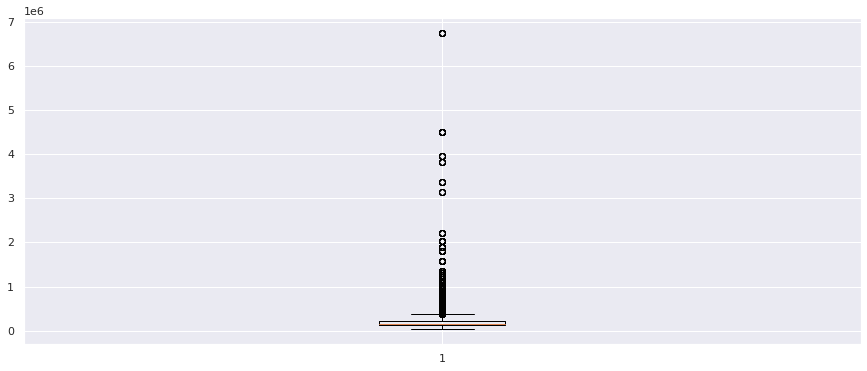

In [ ]:
# APPLICATION_RECORD['AMT_INCOME_TOTAL']-CONTINUOUS FIELD
# NO MISSING RECORDS
# BOX PLOT SHOWS THE DATA HAS HEAVY OUTLIERS
# mean=187524
# median=160780
# mean and median are close
# ALTHOUGH BOX PLOT SHOWS THERE ARE OUTLIERS BUT IN REALITY THERE IS UNIFORM DISTRIBUTION
# Issue is with people having AMT_INCOME_TOTAL = 6750000 and they work as labourers, so it might be a default value
# When AMT_INCOME_TOTAL without data 6750000 is taken
# Mean(in thousand)=187.419538, Median(in thousand)=160.780500
# When all records are considered then
# Mean(in thousand)=187.524286,Median(in thousand)=160.780500
# Not much of difference is coming in calculation but will move ahead with Imputation based on Median
plt.boxplot(APPLICATION_RECORD["AMT_INCOME_TOTAL"])
util_percentiles=APPLICATION_RECORD['AMT_INCOME_TOTAL'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)
#NOTE TO SELF-DRAWING A FREQUENCY COUNT PLOT FOR CONTINUOUS DATA WILL NOT GIVE US ANYTHING TO UNDERSTAND
# plt.hist(APPLICATION_RECORD['AMT_INCOME_TOTAL'])
AMT_INCOME_TOTAL_v1=APPLICATION_RECORD['AMT_INCOME_TOTAL']/1000
AMT_INCOME_TOTAL_v1.describe()
util_percentiles=APPLICATION_RECORD['AMT_INCOME_TOTAL'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(util_percentiles,2)
(APPLICATION_RECORD[APPLICATION_RECORD['AMT_INCOME_TOTAL']!=6750000]['AMT_INCOME_TOTAL']/1000).describe()
(APPLICATION_RECORD['AMT_INCOME_TOTAL']/1000).describe()

print((APPLICATION_RECORD[APPLICATION_RECORD['AMT_INCOME_TOTAL']!=6750000]['AMT_INCOME_TOTAL']/1000).mean())
(APPLICATION_RECORD[APPLICATION_RECORD['AMT_INCOME_TOTAL']!=6750000]['AMT_INCOME_TOTAL']/1000).describe()

In [ ]:
util_percentiles

####APPLICATION_RECORD['DAYS_BIRTH']-CONTINUOUS FIELD(Birthday)

It denotes the DOB of the client. This is storing data backwards from current date. For example -1 denotes yesterday. 

count    438557.000000
mean     -15997.904649
std        4185.030007
min      -25201.000000
25%      -19483.000000
50%      -15630.000000
75%      -12514.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

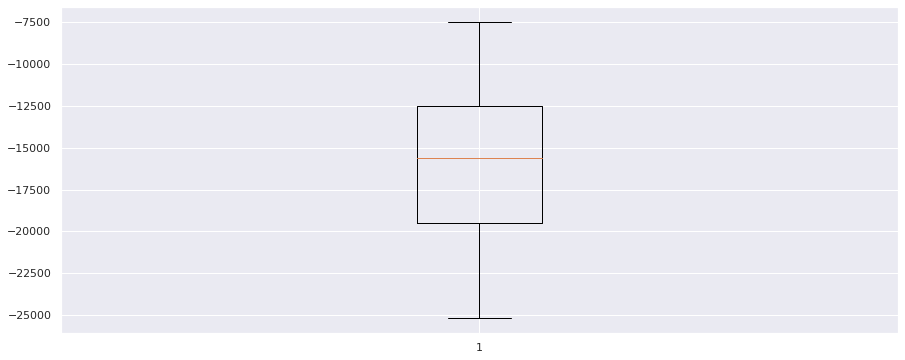

In [ ]:
# APPLICATION_RECORD['DAYS_BIRTH']-CONTINUOUS FIELD(Birthday)
# Count backwards from current day (0), -1 means yesterday
# NO MISSING RECORDS
# No Records with positive values
# Box Plot looks normal
# mean=-15998, median=-15630, so outliers are very small
# max=-7489,min=-25201(Oldest person is 69 yrs old, youngest is 20 yrs old)
plt.boxplot(APPLICATION_RECORD["DAYS_BIRTH"])
APPLICATION_RECORD[APPLICATION_RECORD["DAYS_BIRTH"]>0]
APPLICATION_RECORD["DAYS_BIRTH"].describe()




####APPLICATION_RECORD['DAYS_EMPLOYED']-CONTINUOUS FIELD(Employed since)
It denotes the total working experince of the employee. This also saves data counting days backward from current date.For example -1 implements the employee has been working for 1 day only and any positive data denotes that the employee is not working.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9505f14fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9505f14f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9505f76890>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9520024390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9520024290>],
 'means': []}

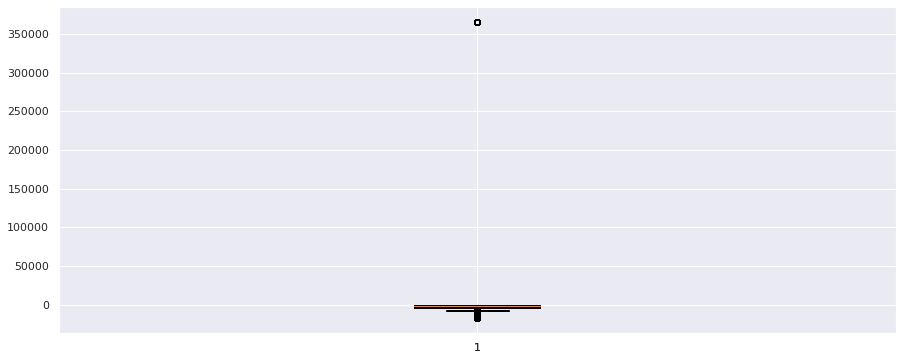

In [ ]:
# APPLICATION_RECORD['DAYS_EMPLOYED']-CONTINUOUS FIELD(Employed since)
# Count backwards from current day (0), -1 means yesterday
# Count backwards from current day(0). If positive, it means the person currently unemployed.
# NO MISSING RECORDS
# 75329 Records with positive values found with vaue as 365243 which might be a default value
# Box Plot does not looks normal because of the above point
# mean=-60563, median=-1467, so huge outliers are there
# max=365243,min=-17531(Max work experience is 48 yrs,min work experience is 13 days)
# 82.82% Records are ok
# DAYS_EMPLOYED value = 365243 for Pensioners,Reason for outliers on the upper side,DAYS_EMPLOYED=NaN
# 164 Records are there who are Pensioners but default value is not 365243
# 365243 is the only positive value but it is more than 584 yrs so out of bound exception is coming as timedelta cannot take beyond 584 yrs, so converting this to 10

APPLICATION_RECORD[APPLICATION_RECORD["DAYS_EMPLOYED"]>0]
APPLICATION_RECORD[APPLICATION_RECORD["DAYS_EMPLOYED"]>0]['DAYS_EMPLOYED'].unique()
plt.boxplot(APPLICATION_RECORD["DAYS_EMPLOYED"])
APPLICATION_RECORD["DAYS_EMPLOYED"].mean()
APPLICATION_RECORD["DAYS_EMPLOYED"].describe()
util_percentiles=APPLICATION_RECORD['DAYS_EMPLOYED'].quantile([0.00,0.01,0.02,0.03,0.04,0.05, 0.1, 0.25, 0.5, 0.75, 0.80,.81,.82,.825,.826,.827,.8281,.8282,.8283,.8284,.8285,.8286,.8287,.8288,.8289,.829,.83,.84,.85,.86,.87,.88,.89, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)
APPLICATION_RECORD_V1=APPLICATION_RECORD[APPLICATION_RECORD['DAYS_EMPLOYED']==365243][['DAYS_EMPLOYED','OCCUPATION_TYPE','AMT_INCOME_TOTAL','NAME_INCOME_TYPE']]
APPLICATION_RECORD_V1['OCCUPATION_TYPE'].unique()
APPLICATION_RECORD_V2=APPLICATION_RECORD[APPLICATION_RECORD['DAYS_EMPLOYED']!=365243]
plt.boxplot(APPLICATION_RECORD_V2["DAYS_EMPLOYED"])


####CREDIT_RECORD['MONTHS_BALANCE']-CONTINUOUS FIELD

This denotes the data of individual number of months for which customer is associated with the business and it's corresponding status is shown in STATUS variable

0.0000   -60.0
0.0100   -54.0
0.0200   -51.0
0.0300   -49.0
0.0400   -47.0
0.0500   -46.0
0.1000   -40.0
0.2500   -29.0
0.5000   -17.0
0.7500    -7.0
0.8000    -6.0
0.8100    -5.0
0.8200    -5.0
0.8250    -5.0
0.8260    -5.0
0.8270    -5.0
0.8281    -5.0
0.8282    -5.0
0.8283    -5.0
0.8284    -5.0
0.8285    -5.0
0.8286    -5.0
0.8287    -5.0
0.8288    -5.0
0.8289    -5.0
0.8290    -5.0
0.8300    -5.0
0.8400    -4.0
0.8500    -4.0
0.8600    -4.0
0.8700    -3.0
0.8800    -3.0
0.8900    -3.0
0.9000    -3.0
0.9100    -2.0
0.9500    -1.0
0.9600    -1.0
0.9700     0.0
0.9750     0.0
0.9800     0.0
0.9900     0.0
1.0000     0.0
Name: MONTHS_BALANCE, dtype: float64

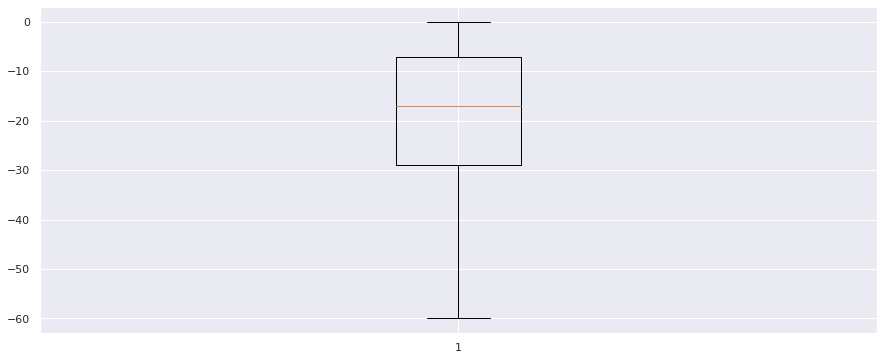

In [ ]:
# CREDIT_RECORD['MONTHS_BALANCE']-CONTINUOUS FIELD
# NO MISSING VALUES
# NO VALUES GREATER THAN 0
# DATA UPTO 61 MONTHS IS PRESENT INCLUDING CURRENT MONTH
# INITIAL ANALYSIS OF BOX PLOT SHOWS THE BODY IS GOOD SO LESS NUMBER OF OUTLIERS
CREDIT_RECORD[CREDIT_RECORD["MONTHS_BALANCE"]>0]
CREDIT_RECORD["MONTHS_BALANCE"].value_counts()
plt.boxplot(CREDIT_RECORD["MONTHS_BALANCE"])
util_percentiles=CREDIT_RECORD['MONTHS_BALANCE'].quantile([0.00,0.01,0.02,0.03,0.04,0.05, 0.1, 0.25, 0.5, 0.75, 0.80,.81,.82,.825,.826,.827,.8281,.8282,.8283,.8284,.8285,.8286,.8287,.8288,.8289,.829,.83,.84,.85,.86,.87,.88,.89, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

# **DERIVING THE TARGET VARIABLE**



The target variable will be derived using two logic

**1) FOR STRICT BANK**
A customer who will be even having a single record of 1 month DPD will be considered as BAD CUSTOMER

**1) FOR LENIENT BANK**
A customer with records of 1 month DPD and 2 month DPD will be considered as GOOD CUSTOMERS given that they do not have a single record of 3 months DPD

In [ ]:
CREDIT_RECORD['ID'].value_counts().describe()
#OBSERVATION-MIN RECORD IS PRESENT FOR 1 MONTH(CURRENT MONTH),MAX RECORD IS PRESENT FOR 61  OR 5 YRS
CREDIT_RECORD.groupby(['ID']).agg({'MONTHS_BALANCE':'min'})
CREDIT_RECORD.sort_values(by=['ID','MONTHS_BALANCE'],ascending=([True,False]))


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


FINDINGS
--------
As we can clearly see that in STRICT approach the percentage of GOOD customers is hardly 13% and that of BAD customers is 87 percent which is not an ideal scenario. So we will take the lenient approach which is actually followed by many banks when they report a customer as bad customer or a loan/cc as NPA only after a customer has failed to pay after 2 months DPD. So we will consider the LENIENT approach where the percentage of BAD customers is close to 1.5% only which is an ideal case considering banking industry.

In [ ]:
# THE LOGIC IS DERIVED BASED ON THE FACTOR THAT OUT OF ALL THE VARIED MONTHS DATA PRESENT FOR DIFFERENT CUSTOMERS WHICH CUSTOMER HAS BEEN IN WHICH CATEGORY FOR HOW MANY TIMES.
# STATUS
#========
# 0: 1-29 days past due 
# 1: 30-59 days past due 
# 2: 60-89 days overdue 
# 3: 90-119 days overdue 
# 4: 120-149 days overdue 
# 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month 
# X: No loan for the month
CREDIT_RECORD_V1=pd.pivot_table(CREDIT_RECORD, values ='MONTHS_BALANCE', index =['ID'],columns =['STATUS'],aggfunc= {'STATUS':'count'}).fillna(0).reset_index().astype(int)
CREDIT_RECORD_V1['TOTAL_NO_OF_MONTHS']=CREDIT_RECORD_V1['0']+CREDIT_RECORD_V1['1']+CREDIT_RECORD_V1['2']+CREDIT_RECORD_V1['3']+CREDIT_RECORD_V1['4']+CREDIT_RECORD_V1['5']+CREDIT_RECORD_V1['C']+CREDIT_RECORD_V1['X']
CREDIT_RECORD_V1.rename(columns={'0':'1_MONTH_LATE','1':'2_MONTH_LATE','2':'3_MONTH_LATE','3':'4_MONTH_LATE','4':'5_MONTH_LATE','5':'OVERDUE_BAD_DEBT','C':'PAID_OFF','X':'NO_LOAN',},inplace=True)
CREDIT_RECORD_V1

STATUS,ID,1_MONTH_LATE,2_MONTH_LATE,3_MONTH_LATE,4_MONTH_LATE,5_MONTH_LATE,OVERDUE_BAD_DEBT,PAID_OFF,NO_LOAN,TOTAL_NO_OF_MONTHS
0,5001711,3,0,0,0,0,0,0,1,4
1,5001712,10,0,0,0,0,0,9,0,19
2,5001713,0,0,0,0,0,0,0,22,22
3,5001714,0,0,0,0,0,0,0,15,15
4,5001715,0,0,0,0,0,0,0,60,60
...,...,...,...,...,...,...,...,...,...,...
45980,5150482,12,0,0,0,0,0,6,0,18
45981,5150483,0,0,0,0,0,0,0,18,18
45982,5150484,12,0,0,0,0,0,1,0,13
45983,5150485,2,0,0,0,0,0,0,0,2


INTRODUCING THE TARGET VARIABLE GOOD_OR_BAD
* 1-GOOD
* 2-BAD

FOR STRICT BANK-ANY CUSTOMER WHO HAVE RECORD OF EVEN 1 MONTHS DPD IS CONSIDERED AS BAD CUSTOMER

In [ ]:
CREDIT_RECORD_STRICT=CREDIT_RECORD_V1
CREDIT_RECORD_STRICT['GOOD_OR_BAD']=0
CREDIT_RECORD_STRICT['GOOD_OR_BAD'][(CREDIT_RECORD_STRICT['1_MONTH_LATE']==0) & 
                                    (CREDIT_RECORD_STRICT['2_MONTH_LATE']==0) &
                                    (CREDIT_RECORD_STRICT['3_MONTH_LATE']==0) &
                                    (CREDIT_RECORD_STRICT['4_MONTH_LATE']==0) &
                                    (CREDIT_RECORD_STRICT['5_MONTH_LATE']==0) &
                                    (CREDIT_RECORD_STRICT['OVERDUE_BAD_DEBT']==0)]=1
print('CREDIT_RECORD_STRICT \n',CREDIT_RECORD_STRICT['GOOD_OR_BAD'].value_counts())

CREDIT_RECORD_STRICT 
 0    40032
1     5953
Name: GOOD_OR_BAD, dtype: int64


FOR LENIENT BANK-ANY CUSTOMER WHO HAVE RECORD FOR 3 MONTH AND ABOVE DPD IS CONSIDERED AS BAD CUSTOMER

In [ ]:
CREDIT_RECORD_LENIENT=CREDIT_RECORD_V1
CREDIT_RECORD_LENIENT['GOOD_OR_BAD']=0
CREDIT_RECORD_LENIENT['GOOD_OR_BAD'][(CREDIT_RECORD_LENIENT['3_MONTH_LATE']==0) &
                                    (CREDIT_RECORD_LENIENT['4_MONTH_LATE']==0) &
                                    (CREDIT_RECORD_LENIENT['5_MONTH_LATE']==0) &
                                    (CREDIT_RECORD_LENIENT['OVERDUE_BAD_DEBT']==0)]=1
print('CREDIT_RECORD_LENIENT \n',CREDIT_RECORD_LENIENT['GOOD_OR_BAD'].value_counts())

CREDIT_RECORD_LENIENT 
 1    45318
0      667
Name: GOOD_OR_BAD, dtype: int64


# **DATA CLEANING AND DATA PREPARATION**

##### APPLICATION_RECORD['ID']

CLEANING METHOD-Deletion of duplicate record

In [ ]:
# APPLICATION_RECORD['ID']-Discrete Field 
# ID HAS 438510 UNIQUE Records ,47 Records are duplicate having only one extra record
# GOOD THING IS THESE 47 RECORDS ARE NOT PRESENT IN THE CREDIT_RECORD TABLE
# AS SUGGESTED BY SIR, GOING TO DROP ANY ONE RANDOM RECORD AS THE PERCENTAGE IS VERY LESS

APPLICATION_RECORD_V1=APPLICATION_RECORD.drop_duplicates(subset=['ID'], keep='last')
APPLICATION_RECORD_V1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


####APPLICATION_RECORD["AMT_INCOME_TOTAL"]
CLEANING METHOD-Standalone imputation based on median

In [ ]:
# APPLICATION_RECORD["AMT_INCOME_TOTAL"]-Continuous Field
# IMPUTATION BASED ON MEDIAN
# Issue is with people having AMT_INCOME_TOTAL = 6750000 and they work as labourers, so it might be a default value
# When AMT_INCOME_TOTAL without data 6750000 is taken
# Mean(in thousand)=187.419538, Median(in thousand)=160.780500
# When all records are considered then
# Mean(in thousand)=187.524286,Median(in thousand)=160.780500
# Not much of difference is coming in calculation but will move ahead with Imputation based on Median
AMT_INCOME_TOTAL_MEDIAN=round(APPLICATION_RECORD_V1["AMT_INCOME_TOTAL"].median(),0)
APPLICATION_RECORD_V1["AMT_INCOME_TOTAL_NEW"]=APPLICATION_RECORD_V1["AMT_INCOME_TOTAL"]
APPLICATION_RECORD_V1['AMT_INCOME_TOTAL_NEW'][APPLICATION_RECORD_V1["AMT_INCOME_TOTAL"]==6750000]=AMT_INCOME_TOTAL_MEDIAN
(APPLICATION_RECORD_V1["AMT_INCOME_TOTAL_NEW"]/1000).describe()
APPLICATION_RECORD_V1.drop('AMT_INCOME_TOTAL',inplace=True,axis=1)
APPLICATION_RECORD_V1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL_NEW
0,5008804,M,Y,Y,0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,427500.0
1,5008805,M,Y,Y,0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,427500.0
2,5008806,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,112500.0
3,5008808,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,270000.0
4,5008809,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,270000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,135000.0
438553,6840222,F,N,N,0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,103500.0
438554,6841878,F,N,N,0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,54000.0
438555,6842765,F,N,Y,0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,72000.0


####APPLICATION_RECORD['OCCUPATION_TYPE']

CLEANING METHOD-Just replacing the missing values with Missing NA value

In [ ]:
# APPLICATION_RECORD['OCCUPATION_TYPE']-Categorical Field
# Takes 18 Discrete Values like Laborers,Core staff etc
# Data has missing records
# 134203 records are null,304354 records present
# 44% of Data is null
#Discrete Field so the imputation has to be based on Target Variable cross tab.
#For the time being just creating the FLAG. 
#IMPUTATION BASED ON TARGET VARIABLE ALSO MAY NOT WORK BECAUSE DATA SET HAS 18 DISCRETE VALUES AS OF NOW AND MISSING DATA IS 44%
#SO EVEN IF WE DO CROSSTAB THEN ALSO IT MIGHT NOT MATCH WITH ANY CATEGORY. 
#SO AS PER SUGGESTION OF SIR, REPLACING THIS WITH "Missing NA"
APPLICATION_RECORD_V1['OCCUPATION_TYPE'][APPLICATION_RECORD_V1['OCCUPATION_TYPE'].isnull()]="Missing NA"
APPLICATION_RECORD_V1['OCCUPATION_TYPE'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Missing NA               134187
Laborers                  78234
Core staff                43000
Sales staff               41096
Managers                  35483
Drivers                   26085
High skill tech staff     17287
Accountants               15982
Medicine staff            13520
Cooking staff              8074
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

####APPLICATION_RECORD["DAYS_EMPLOYED"]
CLEANING METHOD-Just creating a flag for workig and non working.

*   1-Working
*   0-Not Working



In [ ]:
# APPLICATION_RECORD["DAYS_EMPLOYED"]-Continuous Field
# CAN NOT DO IMPUTATION BASED ON MEDIAN HERE BECAUSE IF WE REPLACE THE DEFAULT VALUE WITH MEDIAN THE IT WILL SHOW AS THOSE ID ARE WORKING NOW WHERE AS THOSE PEOPLE ARE ACTUALLY NOT WORKING
# SO JUST CREATING A FLAG WHETHER WORKING OR NOT
# Working=1(363228),Non Working=(75329)
APPLICATION_RECORD_V1['FLAG_EMPLOYED']=1
APPLICATION_RECORD_V1['FLAG_EMPLOYED'][APPLICATION_RECORD_V1['DAYS_EMPLOYED']>0]=0
APPLICATION_RECORD_V1['FLAG_EMPLOYED'].value_counts()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    363191
0     75319
Name: FLAG_EMPLOYED, dtype: int64

####JOINING BOTH TABLES TO GET FINAL DATASET

DF-FINAL DATAFRAME.

In [ ]:
#36457 RECORDS
DF=pd.merge(left=CREDIT_RECORD_LENIENT,right=APPLICATION_RECORD_V1,on='ID',how='inner')
print('Final Data Frame\n================\n',DF.columns.values)
DF['GOOD_OR_BAD'].value_counts()
print('Good customers :',len(DF['GOOD_OR_BAD'][DF['GOOD_OR_BAD']==1]))
print('Bad customers :',len(DF['GOOD_OR_BAD'][DF['GOOD_OR_BAD']==0]))

Final Data Frame
 ['ID' '1_MONTH_LATE' '2_MONTH_LATE' '3_MONTH_LATE' '4_MONTH_LATE'
 '5_MONTH_LATE' 'OVERDUE_BAD_DEBT' 'PAID_OFF' 'NO_LOAN'
 'TOTAL_NO_OF_MONTHS' 'GOOD_OR_BAD' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'NAME_INCOME_TYPE' 'NAME_EDUCATION_TYPE'
 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'FLAG_MOBIL' 'FLAG_WORK_PHONE' 'FLAG_PHONE' 'FLAG_EMAIL'
 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'AMT_INCOME_TOTAL_NEW'
 'FLAG_EMPLOYED']
Good customers : 35841
Bad customers : 616


FINDINGS

Good customers : 35841

Bad customers : 616

Total customers : 36457

**COMPLICATION RESOLUTION**
-----------------------

*   SINGULAR MATRIX
*   ACCURACY,SENSITIVITY,SPECIFICITY TOO HIGH, CLOSE TO 100%
*   TEST DATA HAVING SLIGHTLY BETTER ACCURACY THAN TRAIN DATA 

***********



1. ANY MATRIX WHICH COMPRISES OF RECORDS OF ONLY SINGLE CLASS EITHER CLASS0 OR CLASS1 WILL CAUSE A PROBLEM WHILE BUILDING MODEL AS THE MODEL DOES NOT LEARN ANYTHING FROM IT.SO WE WILL DROP THE COLUMN FLAG_MOBIL AS ALL OF ITS RECORDS CONSISTS OF CLASS1 VALUES ONLY.
2. HERE WE ARE DERIVING THE TARGET VARIABLE(Y-->GOOD_OR_BAD) FROM CREDIT_RECORD DATAFRAME BY TAKING '1_MONTH_LATE','2_MONTH_LATE',
'3_MONTH_LATE','4_MONTH_LATE','5_MONTH_LATE','OVERDUE_BAD_DEBT','PAID_OFF','NO_LOAN' INTO CONSIDERATION. THIS IS CREATING A PROBLEM BECAUSE WE ARE DERIVING TARGET VARIABLE FORM THESE COLUMNS AND ALSO WE ARE PREDICTING THE SAME THING USING THE SAME VARIABLES. SO INDIVIDUAL IMPACT WILL DEFINITELY BE SEEN BUT THE MODEL ACCURACY WILL GO AS HIGH AS 100% BECAUSE WE ARE PREDICTING WHAT WE ARE DERIVING
3. THIRD CASE-SOMETIMES WHILE BUILDING THE MODEL WE COPY THE Y VARIABLE INTO XTRAIN AND XTEST. THIS WILL ALSO GIVE TOO HIGH ACCURACY BECAUSE THE RELATION WILL BECOME 1:1


SOLUTION
*****
1. APPLICABLE TO ONLY THIS PROJECT- REMOVE ALL THE VARIABLES WHICH YOU HAVE USED TO DERIVE THE TARGET VARIABLE
2. APPLICABLE TO ALL PROJECTS-REMOVE ALL SINGULAR MATRICES AND ALSO BEFORE BUILDING THE MODEL, CHECK THE COLUMNS IN XTRAIN AND XTEST




#MODEL M1
METHOD-Logistic Regression

METHODOLOGY-Building the first basic model with only numerical variables.

PACKAGE-sklearn & statsmodel

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic= LogisticRegression()
DF_M1_X=DF.drop(['GOOD_OR_BAD','ID','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
         'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED','OCCUPATION_TYPE','1_MONTH_LATE','2_MONTH_LATE',
         '3_MONTH_LATE','4_MONTH_LATE','5_MONTH_LATE','OVERDUE_BAD_DEBT','PAID_OFF','NO_LOAN'],axis=1)
DF_M1_y=DF[['GOOD_OR_BAD']]
M1_SKLEARN=logistic.fit(DF_M1_X,DF_M1_y)
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

#NOTE TO SELF, WE CAN EITHER WRITE THIS WAY 
# import statsmodels.api as sm
# m1=sm.Logit(DF['GOOD_OR_BAD'],DF[['1_MONTH_LATE']+['2_MONTH_LATE']+['3_MONTH_LATE']+['4_MONTH_LATE']+['5_MONTH_LATE']+
#                                  ['OVERDUE_BAD_DEBT']+['PAID_OFF']+['NO_LOAN']+['TOTAL_NO_OF_MONTHS']+['CNT_CHILDREN']+
#                                  ['DAYS_BIRTH']+['FLAG_MOBIL']+['FLAG_WORK_PHONE']+['FLAG_PHONE']+['FLAG_EMAIL']+
#                                  ['CNT_FAM_MEMBERS']+['AMT_INCOME_TOTAL_NEW']+['FLAG_EMPLOYED']])

# OR SIMPLY IN THIS WAY
import statsmodels.api as sm
M1_STATSMODEL=sm.Logit(DF_M1_y,DF_M1_X)
M1_STATSMODEL.fit()
print(M1_STATSMODEL.fit().summary())


Intercept [1.14416593e-08]
Coefficients [[ 4.71260045e-08  4.34477511e-09 -1.96960115e-04  1.14416593e-08
   3.23800333e-09  3.57299568e-09  4.73865026e-10  2.56247724e-08
   6.02932989e-06  7.27003071e-09]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization terminated successfully.
         Current function value: 0.080467
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.080467
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                36457
Model:                          Logit   Df Residuals:                    36447
Method:                           MLE   Df Model:                            9
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                 0.06108
Time:                        19:04:35   Log-Likelihood:                -2933.6
converged:                       True   LL-Null:                       -3124.4
Covariance Type:            nonrobust   LLR p-value:                 1.099e-76
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

CHECKING INDIVIDUAL IMPACT OF VARIABLES-M1
---------------------------------------

We can see that FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL & AMT_INCOME_TOTAL_NEW have P>|z|>0.05 so we will drop these and check again.

In [ ]:
import statsmodels.api as sm
M1_STATSMODEL=sm.Logit(DF_M1_y,DF_M1_X.drop(['FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','AMT_INCOME_TOTAL_NEW'],axis=1))
M1_STATSMODEL.fit()
print(M1_STATSMODEL.fit().summary())

Optimization terminated successfully.
         Current function value: 0.080488
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.080488
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                36457
Model:                          Logit   Df Residuals:                    36451
Method:                           MLE   Df Model:                            5
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                 0.06084
Time:                        19:04:35   Log-Likelihood:                -2934.3
converged:                       True   LL-Null:                       -3124.4
Covariance Type:            nonrobust   LLR p-value:                 5.478e-80
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

MULTICOLLINEARITY-M1
------------------------------


Did not find any multicollinearity in Model M!

In [ ]:
import statsmodels.formula.api as sm

def vif_cal(input_data):
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

As we can see that removing 1_MONTH_LATE column actually reduced the VIF of rest of the columns to less than 5. so we will remove this column and build the model again

In [ ]:
vif_cal(input_data=DF_M1_X.drop(['FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','AMT_INCOME_TOTAL_NEW'],axis=1))

TOTAL_NO_OF_MONTHS  VIF =  1.01
CNT_CHILDREN  VIF =  4.9
DAYS_BIRTH  VIF =  1.75
FLAG_MOBIL  VIF =  0.0
CNT_FAM_MEMBERS  VIF =  4.79
FLAG_EMPLOYED  VIF =  1.64


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


MODEL M1(After checking Multicollinearity and Individual Impact of Variables)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic= LogisticRegression()
DF_M1_X=DF_M1_X.drop(['FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','AMT_INCOME_TOTAL_NEW'],axis=1) 
M1_SKLEARN=logistic.fit(DF_M1_X,DF_M1_y)
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)
import statsmodels.api as sm
M1_STATSMODEL=sm.Logit(DF_M1_y,DF_M1_X)
M1_STATSMODEL.fit()
print(M1_STATSMODEL.fit().summary())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept [0.00099901]
Coefficients [[-0.02603757  0.00112611 -0.00031745  0.00099901  0.00300479  0.00152164]]
Optimization terminated successfully.
         Current function value: 0.080488
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.080488
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                36457
Model:                          Logit   Df Residuals:                    36451
Method:                           MLE   Df Model:                            5
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                 0.06084
Time:                        19:04:36   Log-Likelihood:                -2934.3
converged:                       True   LL-Null:                       -3124.4
Covariance Type:            nonrobust   LLR p-value:                 5.478e-80
                         coef    std err          z 

MODEL VALIDATION-M1
-------------------


In [ ]:
PREDICT_M1=logistic.predict(DF_M1_X)
PREDICT_M1

CM_M1 = confusion_matrix(DF_M1_y,PREDICT_M1)
print(CM_M1)
SENSITIVITY_M1=(CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1]))
SPECIFICITY_M1=(CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1]))
print('SENSITIVITY:',SENSITIVITY_M1)
print('SPECIFICITY:',SPECIFICITY_M1)


[[    0   616]
 [    0 35841]]
SENSITIVITY: 0.0
SPECIFICITY: 1.0


FINDINGS- We can clearly see that there is a huge imbalance in CLASS-0 and CLASS-1, so we will go for HANDLING CLASS IMBALANCE

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(DF_M1_y,PREDICT_M1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       616
           1       0.98      1.00      0.99     35841

    accuracy                           0.98     36457
   macro avg       0.49      0.50      0.50     36457
weighted avg       0.97      0.98      0.97     36457



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


false_positive_rate, true_positive_rate, thresholds = roc_curve(DF_M1_y, PREDICT_M1)
print("false_positive_rate", false_positive_rate)
print("true_positive_rate", true_positive_rate)
print("thresholds", thresholds)

false_positive_rate [0. 1.]
true_positive_rate [0. 1.]
thresholds [2 1]


FINDINGS- The ROC curve and AUC showed that how flawed is our model

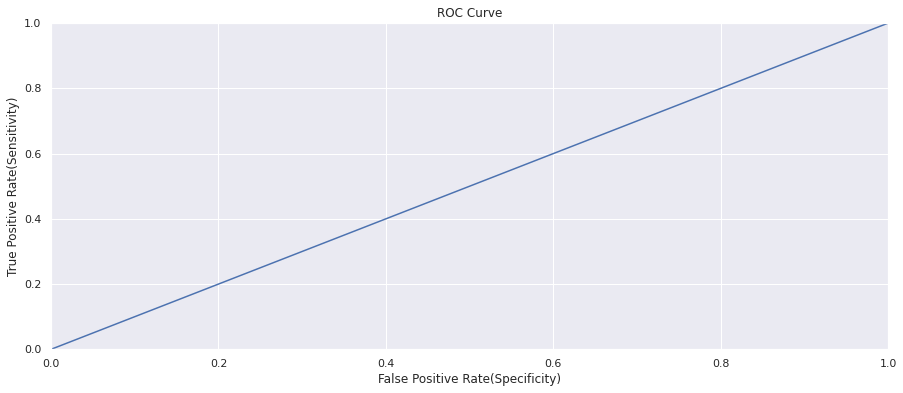

0.5

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

###HANDLING CLASS IMBALANCE-M1
---------------------------


In [ ]:
DF_M1=DF[['TOTAL_NO_OF_MONTHS','CNT_CHILDREN','DAYS_BIRTH','FLAG_MOBIL','CNT_FAM_MEMBERS','FLAG_EMPLOYED','GOOD_OR_BAD']]
DF_M1_CLASS0=DF_M1[DF_M1['GOOD_OR_BAD']==0]
DF_M1_CLASS1=DF_M1[DF_M1['GOOD_OR_BAD']==1]


We will use all three methods for treating CLASS IMBALANCE



1.   Oversampling of Inferior Class-CLASS0
2.   Undersampling of Superior Class-CLASS1
3.   SMOTE-Synthetic Minority Oversampling Technique





In [ ]:
# Over Sampling of Inferior Class
DF_M1_CLASS0=DF_M1_CLASS0.sample(int(10*len(DF_M1[DF_M1['GOOD_OR_BAD']==0])),replace=True)
# Under Sampling of Superior Class
DF_M1_CLASS1=DF_M1_CLASS1.sample(int(.8*len(DF_M1[DF_M1['GOOD_OR_BAD']==1])),replace=True)
DF_M1_BAL=pd.concat([DF_M1_CLASS0,DF_M1_CLASS1])
DF_M1_BAL['GOOD_OR_BAD'].value_counts()


##FINDINGS-- After applying the first two methods we got the following results
# GOOD Customers=28672
# BAD Customers=6160

#Let's now move to SMOTE
from imblearn.over_sampling import SMOTE 
smote = SMOTE(sampling_strategy=0.8,random_state = 2)
DF_M1_X_BAL, DF_M1_y_BAL = smote.fit_resample(DF_M1_BAL.drop('GOOD_OR_BAD',axis=1), DF_M1_BAL[['GOOD_OR_BAD']])

DF_M1_BAL=DF_M1_X_BAL
DF_M1_BAL['GOOD_OR_BAD']=DF_M1_y_BAL


M1-AFTER HANDLING CLASS IMBALANCE



In [ ]:
model_formula="GOOD_OR_BAD ~ TOTAL_NO_OF_MONTHS + CNT_CHILDREN + DAYS_BIRTH + CNT_FAM_MEMBERS + FLAG_EMPLOYED"

FINDINGS- AS FLAG MOBILE CONTAINS ONLY 1, SO IT IS CREATING A SINGULAR MATRIX, SO REMOVING IT, AFTER REMOVING, WHILE VALIDATING THE MODEL, WE FOUND THAT CNT_CHILDREN HAS P>|Z| ASGREATER THAN 0.05 SO WILL DROP THAT ALSO

In [ ]:
import statsmodels.formula.api as sm

MODEL_M1=sm.logit(model_formula, data=DF_M1_BAL)
results=MODEL_M1.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.614645
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                51609
Model:                          Logit   Df Residuals:                    51603
Method:                           MLE   Df Model:                            5
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                  0.1053
Time:                        19:04:37   Log-Likelihood:                -31721.
converged:                       True   LL-Null:                       -35453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2168      0.078      2.793      0.005       0.065       0.369
TOTAL

In [ ]:
model_formula="GOOD_OR_BAD ~ TOTAL_NO_OF_MONTHS  + DAYS_BIRTH + CNT_FAM_MEMBERS + FLAG_EMPLOYED"
import statsmodels.formula.api as sm

MODEL_M1=sm.logit(model_formula, data=DF_M1_BAL)
results=MODEL_M1.fit()
print(results.summary())
predictions = results.predict()
predictions

Optimization terminated successfully.
         Current function value: 0.614867
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                51609
Model:                          Logit   Df Residuals:                    51604
Method:                           MLE   Df Model:                            4
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                  0.1049
Time:                        19:04:37   Log-Likelihood:                -31733.
converged:                       True   LL-Null:                       -35453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3066      0.075      4.069      0.000       0.159       0.454
TOTAL

array([0.37289274, 0.42699438, 0.63321669, ..., 0.32541036, 0.55898709,
       0.52717682])

In [ ]:
logistic= LogisticRegression()
DF_M1_X=DF_M1_X_BAL.drop(['FLAG_MOBIL','GOOD_OR_BAD','CNT_CHILDREN'],axis=1)
DF_M1_y=DF_M1_X_BAL[['GOOD_OR_BAD']]
MODEL_M1=logistic.fit(DF_M1_X,DF_M1_y)
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept [0.05276206]
Coefficients [[-4.80878313e-02 -5.33698767e-05  2.32159747e-01  1.13718961e-01]]


In [ ]:
PREDICT_M1=logistic.predict(DF_M1_X)
PREDICT_M1

CM_M1 = confusion_matrix(DF_M1_y,PREDICT_M1)
print(CM_M1)
SENSITIVITY_M1=(CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1]))
SPECIFICITY_M1=(CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1]))
ACCURACY_M1=(CM_M1[0,0]+CM_M1[1,1])/(CM_M1.sum().sum())
PRECISION_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[1,0])
RECALL_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M1[1,1]/(CM_M1[0,1]+CM_M1[1,1])
RECALL_CLASS1 = CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))

print('SENSITIVITY:',SENSITIVITY_M1)
print('SPECIFICITY:',SPECIFICITY_M1)
print('ACCURACY:',ACCURACY_M1)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )




[[12971  9966]
 [ 7038 21634]]
SENSITIVITY: 0.5655055151065963
SPECIFICITY: 0.7545340401785714
ACCURACY: 0.6705225832703599
PRECISION_CLASS0 :  0.6482582837723024
RECALL_CLASS0 :  0.5655055151065963
F1_CLASS0 :  0.6040609137055837
PRECISION_CLASS1 :  0.684620253164557
RECALL_CLASS1 :  0.7545340401785714
F1_CLASS1 :  0.7178789487655959


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(DF_M1_y,PREDICT_M1))

              precision    recall  f1-score   support

           0       0.65      0.57      0.60     22937
           1       0.68      0.75      0.72     28672

    accuracy                           0.67     51609
   macro avg       0.67      0.66      0.66     51609
weighted avg       0.67      0.67      0.67     51609



false_positive_rate [0.         0.         0.         ... 0.99899725 1.         1.        ]
true_positive_rate [0.00000000e+00 3.48772321e-05 1.74386161e-04 ... 9.99895368e-01
 9.99895368e-01 1.00000000e+00]
thresholds [1.95709761 0.95709761 0.93942098 ... 0.15391063 0.15018733 0.14163834]


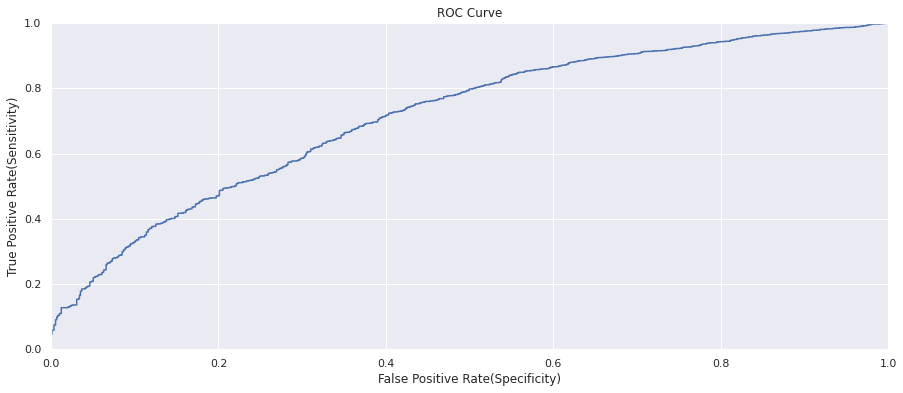

0.715876267823958

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


false_positive_rate, true_positive_rate, thresholds = roc_curve(DF_M1_BAL[['GOOD_OR_BAD']], predictions)
print("false_positive_rate", false_positive_rate)
print("true_positive_rate", true_positive_rate)
print("thresholds", thresholds)

import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

###ADJUSTING THRESHOLD-M1
=====================


FINDINGS- By changing the threshold to .7, we could increase the sensitivity, However the AUC is decreasing

DATA WITH THRESHOLD=0.5
-----------------------



*   SENSITIVITY: 0.5900074116057026
*   SPECIFICITY: 0.7156110491071429
*   ACCURACY: 0.6597880214691236
*   PRECISION_CLASS0 :  0.6240143864988241
*   RECALL_CLASS0 :  0.5900074116057026
*   F1_CLASS0 :  0.606534600215131
*   PRECISION_CLASS1 :  0.6857161954414812
*   RECALL_CLASS1 :  0.7156110491071429
*   F1_CLASS1 :  0.7003447451957538
*   AUC : 0.7242620700251738


DATA WITH THRESHOLD=0.7
-----------------------

*   SENSITIVITY: 0.8642368226010376
*   SPECIFICITY: 0.43812779017857145
*   ACCURACY: 0.6275068302040342
*   PRECISION_CLASS0 :  0.551665599866418
*   RECALL_CLASS0 :  0.8642368226010376
*   F1_CLASS0 :  0.6734499745201291
*   PRECISION_CLASS1 :  0.8013523858127073
*   RECALL_CLASS1 :  0.43812779017857145
*   F1_CLASS1 :  0.566519346982953
*   AUC : 0.6511823063898046

[[19462  3475]
 [16943 11729]]
SENSITIVITY: 0.8484980599032131
SPECIFICITY: 0.40907505580357145
ACCURACY: 0.6043713305818752
PRECISION_CLASS0 :  0.534596896030765
RECALL_CLASS0 :  0.8484980599032131
F1_CLASS0 :  0.6559266623976273
PRECISION_CLASS1 :  0.7714417258616154
RECALL_CLASS1 :  0.40907505580357145
F1_CLASS1 :  0.5346430850578905


0.6287865578533923

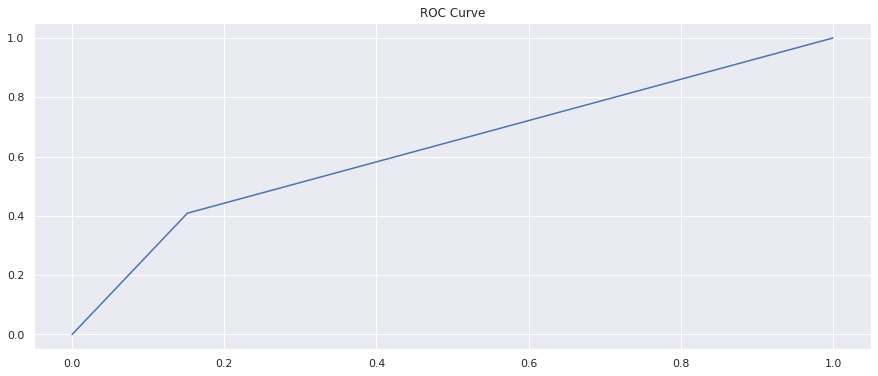

In [ ]:
predictions = results.predict()
### Converting predicted values into classes using threshold
threshold=0.7
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

CM_M1 = confusion_matrix(DF_M1_y,predicted_class1)
print(CM_M1)
SENSITIVITY_M1=(CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1]))
SPECIFICITY_M1=(CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1]))
ACCURACY_M1=(CM_M1[0,0]+CM_M1[1,1])/(CM_M1.sum().sum())
PRECISION_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[1,0])
RECALL_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M1[1,1]/(CM_M1[0,1]+CM_M1[1,1])
RECALL_CLASS1 = CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))

print('SENSITIVITY:',SENSITIVITY_M1)
print('SPECIFICITY:',SPECIFICITY_M1)
print('ACCURACY:',ACCURACY_M1)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )


false_positive_rate, true_positive_rate, thresholds = roc_curve(DF_M1_BAL[['GOOD_OR_BAD']], predicted_class1)

import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

### RANK ORDERING-*M1*

In [ ]:
model_formula="GOOD_OR_BAD ~ TOTAL_NO_OF_MONTHS  + DAYS_BIRTH + CNT_FAM_MEMBERS + FLAG_EMPLOYED"
import statsmodels.formula.api as sm

MODEL_M1=sm.logit(model_formula, data=DF_M1_BAL)
results=MODEL_M1.fit()
print(results.summary())
predictions = results.predict()
predictions

Optimization terminated successfully.
         Current function value: 0.614867
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                51609
Model:                          Logit   Df Residuals:                    51604
Method:                           MLE   Df Model:                            4
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                  0.1049
Time:                        19:04:38   Log-Likelihood:                -31733.
converged:                       True   LL-Null:                       -35453.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3066      0.075      4.069      0.000       0.159       0.454
TOTAL

array([0.37289274, 0.42699438, 0.63321669, ..., 0.32541036, 0.55898709,
       0.52717682])

In [ ]:
DF_M1

,TOTAL_NO_OF_MONTHS,CNT_CHILDREN,DAYS_BIRTH,FLAG_MOBIL,CNT_FAM_MEMBERS,FLAG_EMPLOYED,GOOD_OR_BAD
0,16,0,-12005,1,2.0,1,1
1,15,0,-12005,1,2.0,1,1
2,30,0,-21474,1,2.0,1,1
3,5,0,-19110,1,1.0,1,1
4,5,0,-19110,1,1.0,1,1
...,...,...,...,...,...,...,...
36452,18,1,-10808,1,3.0,1,1
36453,18,1,-10808,1,3.0,1,1
36454,13,1,-10808,1,3.0,1,1
36455,2,1,-10808,1,3.0,1,1


##**DECISION TREE(BEFORE FEATURE ENGINEERING)**



|--- TOTAL_NO_OF_MONTHS <= 35.50
|   |--- TOTAL_NO_OF_MONTHS <= 9.50
|   |   |--- TOTAL_NO_OF_MONTHS <= 4.50
|   |   |   |--- class: 1
|   |   |--- TOTAL_NO_OF_MONTHS >  4.50
|   |   |   |--- DAYS_BIRTH <= -11007.50
|   |   |   |   |--- CNT_FAM_MEMBERS <= 1.50
|   |   |   |   |   |--- DAYS_BIRTH <= -19436.00
|   |   |   |   |   |   |--- DAYS_BIRTH <= -24595.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DAYS_BIRTH >  -24595.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- DAYS_BIRTH >  -19436.00
|   |   |   |   |   |   |--- DAYS_BIRTH <= -18945.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DAYS_BIRTH >  -18945.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- CNT_FAM_MEMBERS >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- DAYS_BIRTH >  -11007.50
|   |   |   |   |--- DAYS_BIRTH <= -10137.50
|   |   |   |   |   |--- DAYS_BIRTH <= -11005.50
|   |   |   |   |   |   |--- class: 0
|   |   |

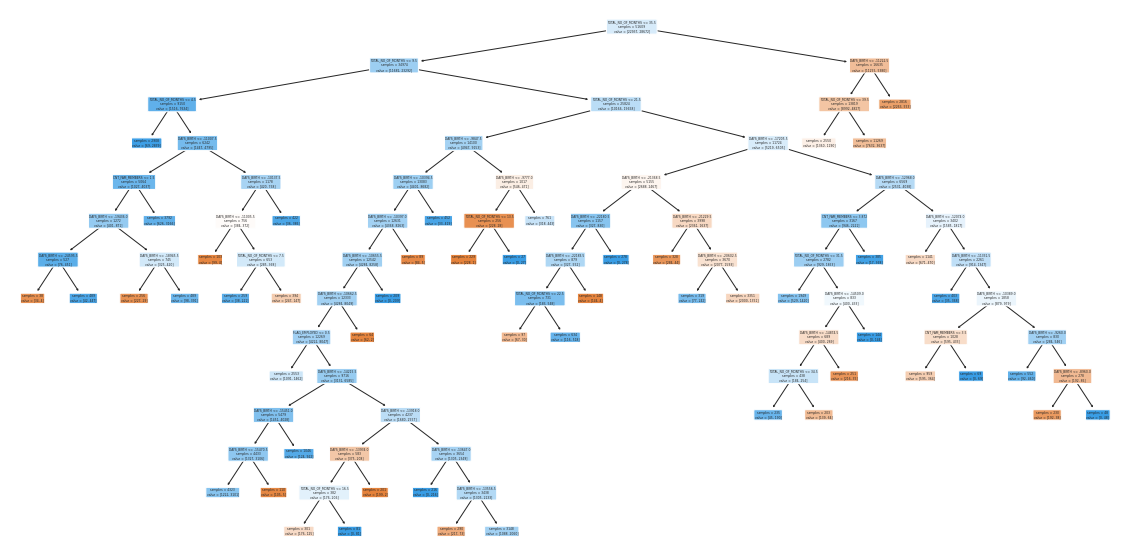

In [ ]:
from sklearn import tree

#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_leaf_nodes = 50)
DTree.fit(DF_M1_X,DF_M1_y)

##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(20,10))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = list(DF_M1_X.columns))
print( export_text(DTree, feature_names = list(DF_M1_X.columns)))

###**TREE VALIDATION**


FINDINGS-We noticed that in general, the train and test accuracy was almost similar about 89% and the sensitivity also increased, however when tested across the real data there was a huge difference of about 10% which we found. We will try FEATURE ENGINEERING NEXT and build our second model

In [ ]:
##########Tree Validation
#Tree Validation
predict1 = DTree.predict(DF_M1_X)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
CM_M1 = confusion_matrix(DF_M1_y, predict1)
print(CM_M1)

CM_M1 = confusion_matrix(DF_M1_y,predict1)
print(CM_M1)
SENSITIVITY_M1=(CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1]))
SPECIFICITY_M1=(CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1]))
ACCURACY_M1=(CM_M1[0,0]+CM_M1[1,1])/(CM_M1.sum().sum())
PRECISION_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[1,0])
RECALL_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M1[1,1]/(CM_M1[0,1]+CM_M1[1,1])
RECALL_CLASS1 = CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))

print('SENSITIVITY:',SENSITIVITY_M1)
print('SPECIFICITY:',SPECIFICITY_M1)
print('ACCURACY:',ACCURACY_M1)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )

[[17241  5696]
 [ 8177 20495]]
[[17241  5696]
 [ 8177 20495]]
SENSITIVITY: 0.7516676112830798
SPECIFICITY: 0.7148088727678571
ACCURACY: 0.7311902962661552
PRECISION_CLASS0 :  0.6782988433393659
RECALL_CLASS0 :  0.7516676112830798
F1_CLASS0 :  0.7131010236790405
PRECISION_CLASS1 :  0.7825207132220992
RECALL_CLASS1 :  0.7148088727678571
F1_CLASS1 :  0.747133769571478


In [ ]:

DF_REAL_DATA=DF[['TOTAL_NO_OF_MONTHS', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'FLAG_EMPLOYED','GOOD_OR_BAD']]
DF_M1_BAL_TRAIN_TEST=DF_M1_BAL.drop(['FLAG_MOBIL','CNT_CHILDREN'],axis=1)

In [ ]:
print(DF_REAL_DATA.columns)
print(DF_M1_BAL_TRAIN_TEST.columns)

Index(['TOTAL_NO_OF_MONTHS', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'FLAG_EMPLOYED',
       'GOOD_OR_BAD'],
      dtype='object')
Index(['TOTAL_NO_OF_MONTHS', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'FLAG_EMPLOYED',
       'GOOD_OR_BAD'],
      dtype='object')


In [ ]:

X_REAL_DATA=DF_REAL_DATA.drop('GOOD_OR_BAD',axis=1)
y_REAL_DATA=DF_REAL_DATA[['GOOD_OR_BAD']]
#SPLITTING TRAIN AND TEST DATA
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_REAL_DATA,y_REAL_DATA, train_size = 0.8 , random_state=333)



In [ ]:
X_BAL_DATA=DF_M1_BAL_TRAIN_TEST.drop('GOOD_OR_BAD',axis=1)
y_BAL_DATA=DF_M1_BAL_TRAIN_TEST[['GOOD_OR_BAD']]
#SPLITTING TRAIN AND TEST DATA
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_BAL_DATA,y_BAL_DATA, train_size = 0.8 , random_state=333)


In [ ]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_leaf_nodes = 150)
DTree.fit(X_train_bal,y_train_bal)


predict1 = DTree.predict(X_train_bal)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
CM_M1 = confusion_matrix(y_train_bal, predict1)


SENSITIVITY_M1=(CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1]))
SPECIFICITY_M1=(CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1]))
ACCURACY_M1=(CM_M1[0,0]+CM_M1[1,1])/(CM_M1.sum().sum())
PRECISION_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[1,0])
RECALL_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M1[1,1]/(CM_M1[0,1]+CM_M1[1,1])
RECALL_CLASS1 = CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))
print('TRAIN DATA PARAMETERS \n')
print(CM_M1)
print('SENSITIVITY:',SENSITIVITY_M1)
print('SPECIFICITY:',SPECIFICITY_M1)
print('ACCURACY:',ACCURACY_M1)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )

TRAIN DATA PARAMETERS 

[[16826  1518]
 [ 6621 16322]]
SENSITIVITY: 0.9172481465329263
SPECIFICITY: 0.711415246480408
ACCURACY: 0.8028677307627098
PRECISION_CLASS0 :  0.7176184586514266
RECALL_CLASS0 :  0.9172481465329263
F1_CLASS0 :  0.8052451484769447
PRECISION_CLASS1 :  0.9149103139013453
RECALL_CLASS1 :  0.711415246480408
F1_CLASS1 :  0.800431552362504


In [ ]:
DTree = tree.DecisionTreeClassifier(max_leaf_nodes = 150)
DTree.fit(X_train_bal,y_train_bal)


predict1 = DTree.predict(X_test_bal)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
CM_M1 = confusion_matrix(y_test_bal, predict1)


SENSITIVITY_M1=(CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1]))
SPECIFICITY_M1=(CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1]))
ACCURACY_M1=(CM_M1[0,0]+CM_M1[1,1])/(CM_M1.sum().sum())
PRECISION_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[1,0])
RECALL_CLASS0 = CM_M1[0,0]/(CM_M1[0,0]+CM_M1[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M1[1,1]/(CM_M1[0,1]+CM_M1[1,1])
RECALL_CLASS1 = CM_M1[1,1]/(CM_M1[1,0]+CM_M1[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))
print('TEST DATA PARAMETERS \n')
print(CM_M1)
print('SENSITIVITY:',SENSITIVITY_M1)
print('SPECIFICITY:',SPECIFICITY_M1)
print('ACCURACY:',ACCURACY_M1)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )

TEST DATA PARAMETERS 

[[4168  425]
 [1691 4038]]
SENSITIVITY: 0.9074678859133464
SPECIFICITY: 0.7048350497469017
ACCURACY: 0.7950009688044952
PRECISION_CLASS0 :  0.7113841952551629
RECALL_CLASS0 :  0.9074678859133464
F1_CLASS0 :  0.7975507079984692
PRECISION_CLASS1 :  0.9047725745014564
RECALL_CLASS1 :  0.7048350497469017
F1_CLASS1 :  0.7923861852433282


# FEATURE ENGINEERING

####APPLYING LABEL ENCODING ON ALL FLAGS


*   FLAG_GENDER
*   FLAG_OWN_CAR
*   FLAG_OWN_REALTY
*   NAME_EDUCATION_TYPE

In [ ]:
# APPLYING LABEL ENCODING ON ALL FLAGS
# CONVERTING CODE_GENDER FORM M,F TO 1,0 FOR PREDICTIVE MODELLING
DF_FE=DF.drop(columns=['ID','1_MONTH_LATE','2_MONTH_LATE','3_MONTH_LATE','4_MONTH_LATE','5_MONTH_LATE','OVERDUE_BAD_DEBT','PAID_OFF','NO_LOAN'])
DF_FE['FLAG_GENDER']=1
DF_FE['FLAG_GENDER'][DF['CODE_GENDER']=='F']=0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# CONVERTING FLAG_OWN_CAR FORM Y,N TO 1,0 FOR PREDICTIVE MODELLING
DF_FE[['FLAG_OWN_CAR']]= DF_FE[['FLAG_OWN_CAR']].replace(['N','Y'],[0,1])


In [ ]:
# CONVERTING FLAG_OWN_REALTY FORM Y,N TO 1,0 FOR PREDICTIVE MODELLING
DF_FE[['FLAG_OWN_REALTY']]=DF_FE[['FLAG_OWN_REALTY']].replace(['N','Y'],[0,1])


In [ ]:
# CONVERTING VALUES TO INTEGER TYPE
DF_FE = DF_FE.astype({"CNT_FAM_MEMBERS":'int',"AMT_INCOME_TOTAL_NEW":'int'}) 


In [ ]:
# CONVERTING NAME_EDUCATION_TYPE AS PER THE FOLLOWING ORDER
# Lower secondary-0
# Secondary / secondary special-1
# Incomplete higher-2
# Higher education-3
# Academic degree-4

DF_FE[['NAME_EDUCATION_TYPE']]=DF_FE[['NAME_EDUCATION_TYPE']].replace(['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree'],[0,1,2,3,4])
DF_FE[['NAME_EDUCATION_TYPE']].value_counts()


NAME_EDUCATION_TYPE
1                      24777
3                       9864
2                       1410
0                        374
4                         32
dtype: int64

In [ ]:
DF_FE.dtypes

TOTAL_NO_OF_MONTHS       int64
GOOD_OR_BAD              int64
CODE_GENDER             object
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE      int64
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int64
AMT_INCOME_TOTAL_NEW     int64
FLAG_EMPLOYED            int64
FLAG_GENDER              int64
dtype: object

####CALCULATING YEARS OF EMPLOYMENT FROM DAYS_EMPLOYED

In [ ]:
#FOR DAYS EMPLOYED, PEOPLE WHO HAVE DAYS EMPLOYED AS +VE WILL BE COUNTED AS 0
#FOR PEOPLE WITH -VE DAYS EMPLOYED, IT WILL BE COUNTED AS YEARS BY DIVIDING THE YEARS WITH 365
DF_FE['DAYS_EMPLOYED']
DF_FE['YEARS_OF_EMPLOYMENT']=0
DF_FE['YEARS_OF_EMPLOYMENT'][DF['DAYS_EMPLOYED']<0]=round((DF['DAYS_EMPLOYED']/365)*-1,0).astype(int)
DF_FE['YEARS_OF_EMPLOYMENT'].unique()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array([12,  3,  8,  0,  2,  4,  6,  9, 19, 15,  5, 13,  7, 17, 30, 16, 11,
        1, 10, 24, 14, 25, 20, 27, 18, 21, 23, 22, 28, 39, 32, 33, 37, 26,
       38, 31, 29, 35, 34, 41, 40, 36, 42, 43])

####CALCULATING AGE FROM DAYS_BIRTH

In [ ]:
#FOR AGE, PEOPLE WHO HAVE DAYS_BIRTH AS +VE WILL BE COUNTED AS 0
#FOR PEOPLE WITH -VE DAYS_BIRTH IT WILL BE COUNTED AS YEARS BY DIVIDING THE YEARS WITH 365
DF_FE['DAYS_BIRTH']
DF_FE['AGE']=0
DF_FE['AGE'][DF['DAYS_BIRTH']<0]=round((DF['DAYS_BIRTH']/365)*-1,0).astype(int)
DF_FE['AGE'].unique()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array([33, 59, 52, 62, 46, 49, 29, 51, 27, 30, 35, 32, 56, 43, 44, 34, 55,
       47, 37, 42, 28, 61, 57, 45, 54, 40, 39, 48, 24, 21, 36, 26, 50, 63,
       58, 41, 60, 64, 31, 38, 53, 22, 23, 25, 65, 67, 66, 69, 68])

In [ ]:
DF_FE.columns

Index(['TOTAL_NO_OF_MONTHS', 'GOOD_OR_BAD', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'AMT_INCOME_TOTAL_NEW', 'FLAG_EMPLOYED', 'FLAG_GENDER',
       'YEARS_OF_EMPLOYMENT', 'AGE'],
      dtype='object')

####DROPPING THE VALUES WHICH ARE NOT IN USE OR ALREADY ENGINEERED AND REPLACED
####DROPPING FLAG_MOBIL AS IT IS A SINGULAR MATRIX

In [ ]:
DF_FE=DF_FE.drop(['CODE_GENDER','DAYS_EMPLOYED','DAYS_BIRTH','FLAG_MOBIL'],axis=1)
DF_FE.columns

Index(['TOTAL_NO_OF_MONTHS', 'GOOD_OR_BAD', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'AMT_INCOME_TOTAL_NEW', 'FLAG_EMPLOYED', 'FLAG_GENDER',
       'YEARS_OF_EMPLOYMENT', 'AGE'],
      dtype='object')

In [ ]:
DF_FE

,TOTAL_NO_OF_MONTHS,GOOD_OR_BAD,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL_NEW,FLAG_EMPLOYED,FLAG_GENDER,YEARS_OF_EMPLOYMENT,AGE
0,16,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,0,0,Missing NA,2,427500,1,1,12,33
1,15,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,0,0,Missing NA,2,427500,1,1,12,33
2,30,1,1,1,0,Working,1,Married,House / apartment,0,0,0,Security staff,2,112500,1,1,3,59
3,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,1,1,Sales staff,1,270000,1,0,8,52
4,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,1,1,Sales staff,1,270000,1,0,8,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,18,1,1,1,1,Working,1,Married,House / apartment,0,0,0,Core staff,3,157500,1,0,5,30
36453,18,1,1,1,1,Working,1,Married,House / apartment,0,0,0,Core staff,3,157500,1,0,5,30
36454,13,1,1,1,1,Working,1,Married,House / apartment,0,0,0,Core staff,3,157500,1,0,5,30
36455,2,1,1,1,1,Working,1,Married,House / apartment,0,0,0,Core staff,3,157500,1,0,5,30


APPLYING ONE HOT ENCODING TO CONVERT CATEGORICAL VARIABLES INTO NUMERIC

*   NAME_INCOME_TYPE
*   NAME_FAMILY_STATUS
*   NAME_HOUSING_TYPE
*   OCCUPATION_TYPE

DF_FE['NAME_INCOME_TYPE']

In [ ]:
DF_ONE_HOT=pd.get_dummies(DF_FE['NAME_INCOME_TYPE']).astype(int)
DF_FE = pd.concat([DF_FE,DF_ONE_HOT],axis=1)

DF_FE.rename(columns={'Commercial associate':'COMMERCIAL_ASSOCIATE',
                     'Pensioner':'PENSIONER','State servant':'STATE_SERVANT','Student':'STUDENT',
                     'Working':'WORKING'},inplace=True)
DF_ONE_HOT
DF_FE

,TOTAL_NO_OF_MONTHS,GOOD_OR_BAD,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,AMT_INCOME_TOTAL_NEW,FLAG_EMPLOYED,FLAG_GENDER,YEARS_OF_EMPLOYMENT,AGE,COMMERCIAL_ASSOCIATE,PENSIONER,STATE_SERVANT,STUDENT,WORKING
0,16,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,...,427500,1,1,12,33,0,0,0,0,1
1,15,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,...,427500,1,1,12,33,0,0,0,0,1
2,30,1,1,1,0,Working,1,Married,House / apartment,0,...,112500,1,1,3,59,0,0,0,0,1
3,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,...,270000,1,0,8,52,1,0,0,0,0
4,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,...,270000,1,0,8,52,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,18,1,1,1,1,Working,1,Married,House / apartment,0,...,157500,1,0,5,30,0,0,0,0,1
36453,18,1,1,1,1,Working,1,Married,House / apartment,0,...,157500,1,0,5,30,0,0,0,0,1
36454,13,1,1,1,1,Working,1,Married,House / apartment,0,...,157500,1,0,5,30,0,0,0,0,1
36455,2,1,1,1,1,Working,1,Married,House / apartment,0,...,157500,1,0,5,30,0,0,0,0,1


DF_FE['NAME_FAMILY_STATUS']

In [ ]:
DF_ONE_HOT=pd.get_dummies(DF_FE['NAME_FAMILY_STATUS']).astype(int)
DF_FE = pd.concat([DF_FE,DF_ONE_HOT],axis=1)
DF_FE.rename(columns={'Civil marriage':'CIVIL_MARRIAGE','Married':'MARRIED','Separated':'SEPARATED',
                     'Lower secondary':'LOWER_SECONDARY',
                      'Single / not married':'SINGLE_NOT_MARRIED','Widow':'WIDOW'},inplace=True)
DF_ONE_HOT
DF_FE

,TOTAL_NO_OF_MONTHS,GOOD_OR_BAD,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,COMMERCIAL_ASSOCIATE,PENSIONER,STATE_SERVANT,STUDENT,WORKING,CIVIL_MARRIAGE,MARRIED,SEPARATED,SINGLE_NOT_MARRIED,WIDOW
0,16,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,...,0,0,0,0,1,1,0,0,0,0
1,15,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,...,0,0,0,0,1,1,0,0,0,0
2,30,1,1,1,0,Working,1,Married,House / apartment,0,...,0,0,0,0,1,0,1,0,0,0
3,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,...,1,0,0,0,0,0,0,0,1,0
4,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,18,1,1,1,1,Working,1,Married,House / apartment,0,...,0,0,0,0,1,0,1,0,0,0
36453,18,1,1,1,1,Working,1,Married,House / apartment,0,...,0,0,0,0,1,0,1,0,0,0
36454,13,1,1,1,1,Working,1,Married,House / apartment,0,...,0,0,0,0,1,0,1,0,0,0
36455,2,1,1,1,1,Working,1,Married,House / apartment,0,...,0,0,0,0,1,0,1,0,0,0


DF_FE['NAME_HOUSING_TYPE']

In [ ]:
DF_ONE_HOT=pd.get_dummies(DF_FE['NAME_HOUSING_TYPE']).astype(int)
DF_FE = pd.concat([DF_FE,DF_ONE_HOT],axis=1)
DF_FE.rename(columns={'Co-op apartment':'CO_OP_APARTMENT','House / apartment':'HOUSE_APARTMENT',
                      'Municipal apartment':'MUNICIPAL_APARTMENT','Office apartment':'OFFICE_APARTMENT',
                      'Rented apartment':'RENTED_APARTMENT','With parents':'WITH_PARENTS'},inplace=True)

DF_ONE_HOT
DF_FE

,TOTAL_NO_OF_MONTHS,GOOD_OR_BAD,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,...,MARRIED,SEPARATED,SINGLE_NOT_MARRIED,WIDOW,CO_OP_APARTMENT,HOUSE_APARTMENT,MUNICIPAL_APARTMENT,OFFICE_APARTMENT,RENTED_APARTMENT,WITH_PARENTS
0,16,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,...,0,0,0,0,0,0,0,0,1,0
1,15,1,1,1,0,Working,3,Civil marriage,Rented apartment,1,...,0,0,0,0,0,0,0,0,1,0
2,30,1,1,1,0,Working,1,Married,House / apartment,0,...,1,0,0,0,0,1,0,0,0,0
3,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,...,0,0,1,0,0,1,0,0,0,0
4,5,1,0,1,0,Commercial associate,1,Single / not married,House / apartment,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,18,1,1,1,1,Working,1,Married,House / apartment,0,...,1,0,0,0,0,1,0,0,0,0
36453,18,1,1,1,1,Working,1,Married,House / apartment,0,...,1,0,0,0,0,1,0,0,0,0
36454,13,1,1,1,1,Working,1,Married,House / apartment,0,...,1,0,0,0,0,1,0,0,0,0
36455,2,1,1,1,1,Working,1,Married,House / apartment,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
DF_ONE_HOT=pd.get_dummies(DF_FE['OCCUPATION_TYPE']).astype(int)
DF_FE = pd.concat([DF_FE,DF_ONE_HOT],axis=1)
DF_FE.rename(columns={'Accountants':'ACCOUNTANTS','Cleaning staff':'CLEANING_STAFF','Cooking staff':'COOKING_STAFF',
                     'Core staff':'CORE_STAFF','Drivers':'DRIVERS','HR staff':'HR_STAFF',
                     'High skill tech staff':'HIGH_SKILL_TECH_STAFF','IT staff':'IT_STAFF','Laborers':'LABOURERS',
                     'Low-skill Laborers':'LOW_SKILL_LABOURERS','Managers':'MANAGERS',
                     'Medicine staff':'MEDICINE_STAFF','Missing NA':'MISSING_NA',
                     'Private service staff':'PRIVATE_SERVICE_STAFF','Realty agents':'REALTY_AGENTS',
                     'Sales staff':'SALES_STAFF','Secretaries':'SECRETARIES','Security staff':'SECURITY_STAFF',
                     'Waiters/barmen staff':'WAITER_BARMEN_STAFF'},inplace=True)


In [ ]:
DF_FE=DF_FE.drop(['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'],axis=1)
print('So far the number of FEATURES:', len(DF_FE.columns))

So far the number of FEATURES: 50


In [ ]:
DF_FE.columns


Index(['TOTAL_NO_OF_MONTHS', 'GOOD_OR_BAD', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL_NEW',
       'FLAG_EMPLOYED', 'FLAG_GENDER', 'YEARS_OF_EMPLOYMENT', 'AGE',
       'COMMERCIAL_ASSOCIATE', 'PENSIONER', 'STATE_SERVANT', 'STUDENT',
       'WORKING', 'CIVIL_MARRIAGE', 'MARRIED', 'SEPARATED',
       'SINGLE_NOT_MARRIED', 'WIDOW', 'CO_OP_APARTMENT', 'HOUSE_APARTMENT',
       'MUNICIPAL_APARTMENT', 'OFFICE_APARTMENT', 'RENTED_APARTMENT',
       'WITH_PARENTS', 'ACCOUNTANTS', 'CLEANING_STAFF', 'COOKING_STAFF',
       'CORE_STAFF', 'DRIVERS', 'HR_STAFF', 'HIGH_SKILL_TECH_STAFF',
       'IT_STAFF', 'LABOURERS', 'LOW_SKILL_LABOURERS', 'MANAGERS',
       'MEDICINE_STAFF', 'MISSING_NA', 'PRIVATE_SERVICE_STAFF',
       'REALTY_AGENTS', 'SALES_STAFF', 'SECRETARIES', 'SECURITY_STAFF',
       'WAITER_BARMEN_STAFF'],
      dtype='object')

#MODEL M2
METHOD-Logistic Regression & Decision Tree

METHODOLOGY-Building the model after doing FEATURE ENGINEERING

PACKAGE-sklearn & statsmodel

**METHOD-LOGISTIC REGRESSION**

In [ ]:
logistic= LogisticRegression()
logistic.fit(DF_FE.drop('GOOD_OR_BAD',axis=1),DF_FE[['GOOD_OR_BAD']])
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept [0.00132908]
Coefficients [[ 7.51642381e-03  1.69395552e-04  9.65533145e-04  4.52113545e-04
   1.42523395e-03  3.61091504e-04  4.19958666e-04  4.75167134e-05
   2.91454681e-03  6.22839846e-06  7.92021929e-04 -4.58095919e-05
   7.36778762e-03  6.52393557e-02  5.71528213e-05  4.93077583e-04
   1.18944261e-04  5.88073018e-07  6.59318047e-04  9.36620461e-05
   1.06693166e-03  7.74400620e-05  6.33272585e-05  2.77197631e-05
   2.74007945e-06  1.22102553e-03  2.64816222e-05 -3.79716089e-06
   1.29913574e-05  6.96393583e-05  1.64435693e-05  6.18622965e-05
   5.61989804e-05  7.14516400e-05 -3.94142178e-05  1.28991128e-06
   1.24685888e-06 -4.80470773e-06  1.66753111e-04  3.48008295e-06
  -4.35844269e-05  9.76453709e-05  7.11134354e-04  1.26248597e-05
   1.07688450e-06  1.83397598e-04  8.56088406e-06  1.36917461e-05
   1.00259908e-05]]


In [ ]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [ ]:
model_formula=ols_formula(DF_FE, dependent_var="GOOD_OR_BAD")
print('Model Formula\n',model_formula)

Model Formula
 GOOD_OR_BAD ~ TOTAL_NO_OF_MONTHS + FLAG_OWN_CAR + FLAG_OWN_REALTY + CNT_CHILDREN + NAME_EDUCATION_TYPE + FLAG_WORK_PHONE + FLAG_PHONE + FLAG_EMAIL + CNT_FAM_MEMBERS + AMT_INCOME_TOTAL_NEW + FLAG_EMPLOYED + FLAG_GENDER + YEARS_OF_EMPLOYMENT + AGE + COMMERCIAL_ASSOCIATE + PENSIONER + STATE_SERVANT + STUDENT + WORKING + CIVIL_MARRIAGE + MARRIED + SEPARATED + SINGLE_NOT_MARRIED + WIDOW + CO_OP_APARTMENT + HOUSE_APARTMENT + MUNICIPAL_APARTMENT + OFFICE_APARTMENT + RENTED_APARTMENT + WITH_PARENTS + ACCOUNTANTS + CLEANING_STAFF + COOKING_STAFF + CORE_STAFF + DRIVERS + HR_STAFF + HIGH_SKILL_TECH_STAFF + IT_STAFF + LABOURERS + LOW_SKILL_LABOURERS + MANAGERS + MEDICINE_STAFF + MISSING_NA + PRIVATE_SERVICE_STAFF + REALTY_AGENTS + SALES_STAFF + SECRETARIES + SECURITY_STAFF + WAITER_BARMEN_STAFF


In [ ]:
print(len(DF_FE.columns))
DF_FE.columns


50


Index(['TOTAL_NO_OF_MONTHS', 'GOOD_OR_BAD', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL_NEW',
       'FLAG_EMPLOYED', 'FLAG_GENDER', 'YEARS_OF_EMPLOYMENT', 'AGE',
       'COMMERCIAL_ASSOCIATE', 'PENSIONER', 'STATE_SERVANT', 'STUDENT',
       'WORKING', 'CIVIL_MARRIAGE', 'MARRIED', 'SEPARATED',
       'SINGLE_NOT_MARRIED', 'WIDOW', 'CO_OP_APARTMENT', 'HOUSE_APARTMENT',
       'MUNICIPAL_APARTMENT', 'OFFICE_APARTMENT', 'RENTED_APARTMENT',
       'WITH_PARENTS', 'ACCOUNTANTS', 'CLEANING_STAFF', 'COOKING_STAFF',
       'CORE_STAFF', 'DRIVERS', 'HR_STAFF', 'HIGH_SKILL_TECH_STAFF',
       'IT_STAFF', 'LABOURERS', 'LOW_SKILL_LABOURERS', 'MANAGERS',
       'MEDICINE_STAFF', 'MISSING_NA', 'PRIVATE_SERVICE_STAFF',
       'REALTY_AGENTS', 'SALES_STAFF', 'SECRETARIES', 'SECURITY_STAFF',
       'WAITER_BARMEN_STAFF'],
      dtype='object')

MULTICOLLINEARITY-M2
--------------------



In [ ]:
#MULTICOLLINEARITY CHECK
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

**CHECKING MULTICOLLINEARITY**

NOTE TO SELF- Whenever there is inf for all values of a cluster after Feature Engineering, then VIF should be checked for each group separately. 

For Example for OCCUPATION_TYPE we got these many distinct values

OCCUPATION_TYPE      
Missing NA               11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60

However while checking VIF collectively, all came as inf. So one value needs to be dropped first to check the highest VIF as after dropping one value VIF will change into number and then replace the original Variable which was dropped with the Variable having highest VIF and then continue the process.


Same needs to be done with all categorical fields converted to 1,0 by ONE HOT ENCODING


In [ ]:
vif_cal(input_data=DF_FE.drop(['MISSING_NA','MARRIED','SINGLE_NOT_MARRIED','HOUSE_APARTMENT','WORKING','PENSIONER','CNT_FAM_MEMBERS'],axis=1), dependent_col="GOOD_OR_BAD")

TOTAL_NO_OF_MONTHS  VIF =  1.02
FLAG_OWN_CAR  VIF =  1.23
FLAG_OWN_REALTY  VIF =  1.11
CNT_CHILDREN  VIF =  1.15
NAME_EDUCATION_TYPE  VIF =  1.23
FLAG_WORK_PHONE  VIF =  1.26
FLAG_PHONE  VIF =  1.13
FLAG_EMAIL  VIF =  1.04
AMT_INCOME_TOTAL_NEW  VIF =  1.24
FLAG_EMPLOYED  VIF =  3.33
FLAG_GENDER  VIF =  1.57
YEARS_OF_EMPLOYMENT  VIF =  1.47
AGE  VIF =  2.21
COMMERCIAL_ASSOCIATE  VIF =  1.18
STATE_SERVANT  VIF =  1.18
STUDENT  VIF =  1.0
CIVIL_MARRIAGE  VIF =  1.03
SEPARATED  VIF =  1.03
WIDOW  VIF =  1.09
CO_OP_APARTMENT  VIF =  1.01
MUNICIPAL_APARTMENT  VIF =  1.03
OFFICE_APARTMENT  VIF =  1.01
RENTED_APARTMENT  VIF =  1.02
WITH_PARENTS  VIF =  1.08
ACCOUNTANTS  VIF =  1.23
CLEANING_STAFF  VIF =  1.13
COOKING_STAFF  VIF =  1.12
CORE_STAFF  VIF =  1.58
DRIVERS  VIF =  1.49
HR_STAFF  VIF =  1.02
HIGH_SKILL_TECH_STAFF  VIF =  1.22
IT_STAFF  VIF =  1.01
LABOURERS  VIF =  1.95
LOW_SKILL_LABOURERS  VIF =  1.05
MANAGERS  VIF =  1.54
MEDICINE_STAFF  VIF =  1.25
PRIVATE_SERVICE_STAFF  VIF =  1.

**CHECKING INDIVIDUAL VARIABLE IMPACT**
---------------------------------------


DROPPING THE VARIABLES WHERE MULTICOLLINEARITY WAS FOUND

In [ ]:
# model_formula=ols_formula(DF_FE.drop(['MISSING_NA','MARRIED','SINGLE_NOT_MARRIED','HOUSE_APARTMENT','WORKING','PENSIONER','CNT_FAM_MEMBERS'],axis=1), dependent_var="GOOD_OR_BAD")
# print('Model Formula\n',model_formula)
DF_M2_NEW=DF_FE.drop(['MISSING_NA','MARRIED','SINGLE_NOT_MARRIED','HOUSE_APARTMENT','WORKING','PENSIONER','CNT_FAM_MEMBERS'],axis=1)
M2=sm.logit('GOOD_OR_BAD ~ TOTAL_NO_OF_MONTHS + FLAG_OWN_CAR + FLAG_OWN_REALTY + CNT_CHILDREN + NAME_EDUCATION_TYPE + FLAG_WORK_PHONE + FLAG_PHONE + FLAG_EMAIL + AMT_INCOME_TOTAL_NEW + FLAG_EMPLOYED + FLAG_GENDER + YEARS_OF_EMPLOYMENT + AGE + COMMERCIAL_ASSOCIATE + STATE_SERVANT + STUDENT + CIVIL_MARRIAGE + SEPARATED + WIDOW + CO_OP_APARTMENT + MUNICIPAL_APARTMENT + OFFICE_APARTMENT + RENTED_APARTMENT + WITH_PARENTS + ACCOUNTANTS + CLEANING_STAFF + COOKING_STAFF + CORE_STAFF + DRIVERS + HR_STAFF + HIGH_SKILL_TECH_STAFF + IT_STAFF + LABOURERS + LOW_SKILL_LABOURERS + MANAGERS + MEDICINE_STAFF + PRIVATE_SERVICE_STAFF + REALTY_AGENTS + SALES_STAFF + SECRETARIES + SECURITY_STAFF + WAITER_BARMEN_STAFF',
            data=DF_M2_NEW)
results=M2.fit()
print(results.summary())

         Current function value: 0.079025
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                36457
Model:                          Logit   Df Residuals:                    36414
Method:                           MLE   Df Model:                           42
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                 0.07791
Time:                        19:04:53   Log-Likelihood:                -2881.0
converged:                      False   LL-Null:                       -3124.4
Covariance Type:            nonrobust   LLR p-value:                 4.620e-77
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.8786      0.350     13.922      0.000       4.192       5.565
TOTAL_NO_OF_MONTHS       -0.0484      0.003    -19.320      0.000      -0.053      -0.044
FLAG_OWN

In [ ]:
M2=sm.logit('GOOD_OR_BAD ~ TOTAL_NO_OF_MONTHS + FLAG_OWN_CAR + FLAG_OWN_REALTY + FLAG_GENDER + YEARS_OF_EMPLOYMENT + WIDOW + MUNICIPAL_APARTMENT + CORE_STAFF + LOW_SKILL_LABOURERS',
            data=DF_M2_NEW)
results=M2.fit()
print(results.summary())


Optimization terminated successfully.
         Current function value: 0.079446
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                36457
Model:                          Logit   Df Residuals:                    36447
Method:                           MLE   Df Model:                            9
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                 0.07300
Time:                        19:04:53   Log-Likelihood:                -2896.4
converged:                       True   LL-Null:                       -3124.4
Covariance Type:            nonrobust   LLR p-value:                 1.369e-92
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.1223      0.122     41.968      0.000       4.883       5.362
TO

In [ ]:
DF_M2_FINAL=DF_M2_NEW[['TOTAL_NO_OF_MONTHS','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_GENDER','YEARS_OF_EMPLOYMENT','WIDOW','MUNICIPAL_APARTMENT','CORE_STAFF','GOOD_OR_BAD']]

In [ ]:
import statsmodels.api as sm
DF_M2_FE_X=DF_M2_FINAL.drop('GOOD_OR_BAD',axis=1)
DF_M2_FE_y=DF_M2_FINAL[['GOOD_OR_BAD']]
M2_STATSMODEL=sm.Logit(DF_M2_FE_y,DF_M2_FE_X)
M2_STATSMODEL.fit()
print(M2_STATSMODEL.fit().summary())

Optimization terminated successfully.
         Current function value: 0.123354
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.123354
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            GOOD_OR_BAD   No. Observations:                36457
Model:                          Logit   Df Residuals:                    36449
Method:                           MLE   Df Model:                            7
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                 -0.4393
Time:                        19:04:54   Log-Likelihood:                -4497.1
converged:                       True   LL-Null:                       -3124.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
DF_FE.columns

Index(['TOTAL_NO_OF_MONTHS', 'GOOD_OR_BAD', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL_NEW',
       'FLAG_EMPLOYED', 'FLAG_GENDER', 'YEARS_OF_EMPLOYMENT', 'AGE',
       'COMMERCIAL_ASSOCIATE', 'PENSIONER', 'STATE_SERVANT', 'STUDENT',
       'WORKING', 'CIVIL_MARRIAGE', 'MARRIED', 'SEPARATED',
       'SINGLE_NOT_MARRIED', 'WIDOW', 'CO_OP_APARTMENT', 'HOUSE_APARTMENT',
       'MUNICIPAL_APARTMENT', 'OFFICE_APARTMENT', 'RENTED_APARTMENT',
       'WITH_PARENTS', 'ACCOUNTANTS', 'CLEANING_STAFF', 'COOKING_STAFF',
       'CORE_STAFF', 'DRIVERS', 'HR_STAFF', 'HIGH_SKILL_TECH_STAFF',
       'IT_STAFF', 'LABOURERS', 'LOW_SKILL_LABOURERS', 'MANAGERS',
       'MEDICINE_STAFF', 'MISSING_NA', 'PRIVATE_SERVICE_STAFF',
       'REALTY_AGENTS', 'SALES_STAFF', 'SECRETARIES', 'SECURITY_STAFF',
       'WAITER_BARMEN_STAFF'],
      dtype='object')

HANDLING CLASS IMBALANCE IN M2
--------------------------------


We will use only one  methods for treating CLASS IMBALANCE

1.   SMOTE-Synthetic Minority Oversampling Technique

In [ ]:

#Let's now move to SMOTE
from imblearn.over_sampling import SMOTE 
smote = SMOTE(sampling_strategy=0.8,random_state = 2)
DF_M2_FE_X_BAL, DF_M2_FE_y_BAL = smote.fit_resample(DF_FE.drop('GOOD_OR_BAD',axis=1), DF_FE[['GOOD_OR_BAD']])

print('BAD CUSTOMERS:',len(DF_M2_FE_y_BAL[DF_M2_FE_y_BAL['GOOD_OR_BAD']==0]))
print('GOOD CUSTOMERS:',len(DF_M2_FE_y_BAL[DF_M2_FE_y_BAL['GOOD_OR_BAD']==1]))

DF_M2_FE_BAL=DF_M2_FE_X_BAL
DF_M2_FE_BAL['GOOD_OR_BAD']=DF_M2_FE_y_BAL
DF_M2_FE_BAL[['GOOD_OR_BAD']]

BAD CUSTOMERS: 28672
GOOD CUSTOMERS: 35841


,GOOD_OR_BAD
0,1
1,1
2,1
3,1
4,1
...,...
64508,0
64509,0
64510,0
64511,0


##**DECISION TREE AFTER FEATURE ENGINEERING**



In [ ]:
#REAL DATA SPLIT INTO TEST AND TRAIN
X_REAL_DATA=DF_FE.drop('GOOD_OR_BAD',axis=1)
y_REAL_DATA=DF_FE[['GOOD_OR_BAD']]
#SPLITTING TRAIN AND TEST DATA
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_REAL_DATA,y_REAL_DATA, train_size = 0.8 , random_state=333)

len(X_test_real.columns)

49

In [ ]:
#BALANCED DATA SPLIT INTO TEST AND TRAIN
X_BAL_DATA=DF_M2_FE_BAL.drop('GOOD_OR_BAD',axis=1)
y_BAL_DATA=DF_M2_FE_BAL[['GOOD_OR_BAD']]
#SPLITTING TRAIN AND TEST DATA
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_BAL_DATA,y_BAL_DATA, train_size = 0.8 , random_state=333)
len(X_test_bal.columns)
X_train_bal

,TOTAL_NO_OF_MONTHS,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL_NEW,...,LOW_SKILL_LABOURERS,MANAGERS,MEDICINE_STAFF,MISSING_NA,PRIVATE_SERVICE_STAFF,REALTY_AGENTS,SALES_STAFF,SECRETARIES,SECURITY_STAFF,WAITER_BARMEN_STAFF
8773,61,0,1,1,1,0,0,0,3,135000,...,0,0,0,1,0,0,0,0,0,0
39584,11,0,0,0,1,0,0,1,2,92203,...,0,0,0,1,0,0,0,0,0,0
57030,22,0,0,0,2,0,0,0,2,177263,...,0,0,0,0,0,0,0,0,0,0
59878,32,1,0,0,1,0,0,0,2,157500,...,0,0,0,0,0,0,0,0,0,0
41326,51,0,1,0,1,0,0,0,2,67500,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22451,3,0,1,0,3,0,0,0,2,130500,...,0,0,0,1,0,0,0,0,0,0
58787,5,0,1,0,2,0,0,0,1,67500,...,0,0,0,0,0,0,0,0,0,0
33741,30,1,0,4,1,1,0,0,6,202500,...,0,0,0,0,0,0,0,0,0,0
30476,30,1,1,0,1,0,1,0,2,360000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn import tree

#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_leaf_nodes = 45)
DTree.fit(X_train_bal,y_train_bal)


DecisionTreeClassifier(max_leaf_nodes=45)

###TREE VALIDATION

In [ ]:
predict1 = DTree.predict(X_train_bal)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
CM_M2 = confusion_matrix(y_train_bal, predict1)
print(CM_M2)
SENSITIVITY_M2=(CM_M2[0,0]/(CM_M2[0,0]+CM_M2[0,1]))
SPECIFICITY_M2=(CM_M2[1,1]/(CM_M2[1,0]+CM_M2[1,1]))
ACCURACY_M2=(CM_M2[0,0]+CM_M2[1,1])/(CM_M2.sum().sum())
PRECISION_CLASS0 = CM_M2[0,0]/(CM_M2[0,0]+CM_M2[1,0])
RECALL_CLASS0 = CM_M2[0,0]/(CM_M2[0,0]+CM_M2[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M2[1,1]/(CM_M2[0,1]+CM_M2[1,1])
RECALL_CLASS1 = CM_M2[1,1]/(CM_M2[1,0]+CM_M2[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))
print('Train Data Details\n==================')
print('SENSITIVITY:',SENSITIVITY_M2)
print('SPECIFICITY:',SPECIFICITY_M2)
print('ACCURACY:',ACCURACY_M2)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )

[[16734  6208]
 [ 2498 26170]]
Train Data Details
SENSITIVITY: 0.7294045854764188
SPECIFICITY: 0.9128645179293986
ACCURACY: 0.8313117612865724
PRECISION_CLASS0 :  0.87011231281198
RECALL_CLASS0 :  0.7294045854764188
F1_CLASS0 :  0.79356949779485
PRECISION_CLASS1 :  0.8082648712088455
RECALL_CLASS1 :  0.9128645179293986
F1_CLASS1 :  0.8573862333322412


In [ ]:
predict1 = DTree.predict(X_test_real)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
CM_M2 = confusion_matrix(y_test_real, predict1)
print(CM_M2)
SENSITIVITY_M2=(CM_M2[0,0]/(CM_M2[0,0]+CM_M2[0,1]))
SPECIFICITY_M2=(CM_M2[1,1]/(CM_M2[1,0]+CM_M2[1,1]))
ACCURACY_M2=(CM_M2[0,0]+CM_M2[1,1])/(CM_M2.sum().sum())
PRECISION_CLASS0 = CM_M2[0,0]/(CM_M2[0,0]+CM_M2[1,0])
RECALL_CLASS0 = CM_M2[0,0]/(CM_M2[0,0]+CM_M2[0,1])
F1_CLASS0 = 2/((1/PRECISION_CLASS0)+(1/RECALL_CLASS0))
PRECISION_CLASS1 = CM_M2[1,1]/(CM_M2[0,1]+CM_M2[1,1])
RECALL_CLASS1 = CM_M2[1,1]/(CM_M2[1,0]+CM_M2[1,1])
F1_CLASS1 = 2/((1/PRECISION_CLASS1)+(1/RECALL_CLASS1))
print('Test Data Details\n==================')
print('SENSITIVITY:',SENSITIVITY_M2)
print('SPECIFICITY:',SPECIFICITY_M2)
print('ACCURACY:',ACCURACY_M2)
print('PRECISION_CLASS0 : ', PRECISION_CLASS0 )
print('RECALL_CLASS0 : ', RECALL_CLASS0 )
print('F1_CLASS0 : ', F1_CLASS0 )
print('PRECISION_CLASS1 : ', PRECISION_CLASS1 )
print('RECALL_CLASS1 : ', RECALL_CLASS1 )
print('F1_CLASS1 : ', F1_CLASS1 )

[[  27   80]
 [ 660 6525]]
Test Data Details
SENSITIVITY: 0.2523364485981308
SPECIFICITY: 0.9081419624217119
ACCURACY: 0.8985189248491497
PRECISION_CLASS0 :  0.039301310043668124
RECALL_CLASS0 :  0.2523364485981308
F1_CLASS0 :  0.06801007556675064
PRECISION_CLASS1 :  0.987887963663891
RECALL_CLASS1 :  0.9081419624217119
F1_CLASS1 :  0.9463379260333575


#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, max_features=10, max_leaf_nodes = 90)
# n_estimators - Trees - As high as possible
# max_features - p - low ==>(sqrt(t))
# max_depth - Slightly higher than single tree
forest.fit(X_train_bal,y_train_bal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_features=10, max_leaf_nodes=90)

In [ ]:
#####predicting on test data ####
Forest_predict_train=forest.predict(X_train_bal)
Forest_predict=forest.predict(X_test_real)

########Train Data Validation
cm1 = confusion_matrix(y_train_bal,Forest_predict_train)
print("Confusion Matrix for Train data \n", cm1)
total1=sum(sum(cm1))
accuracy_tree=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of Train data \n", accuracy_tree)

########Test Data Validation
cm1 = confusion_matrix(y_test_real,Forest_predict)
print("Confusion Matrix for test data \n", cm1)
total1=sum(sum(cm1))
accuracy_tree=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of test data \n", accuracy_tree)

Confusion Matrix for Train data 
 [[19395  3547]
 [  682 27986]]
Accuracy of Train data 
 0.9180585157915133
Confusion Matrix for test data 
 [[  31   76]
 [ 169 7016]]
Accuracy of test data 
 0.9664015359297861


# BOOSTING

##GRADIENT BOOSTING METHOD

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, verbose=1) 
##fitting the gradient boost classifier
start_time = time.time()
boost.fit(X_train_bal,y_train_bal)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

      Iter       Train Loss   Remaining Time 
         1           1.3313            6.65s
         2           1.2929            6.21s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         3           1.2581            6.11s
         4           1.2275            6.06s
         5           1.2018            5.99s
         6           1.1780            5.87s
         7           1.1547            5.79s
         8           1.1345            5.72s
         9           1.1136            5.63s
        10           1.0956            5.64s
        20           0.9297            4.97s
        30           0.8252            4.25s


In [ ]:
###predicting Gradient boosting model on the train Data
from sklearn.metrics import f1_score
boost_predict_train=boost.predict(X_train_bal)
cm1 = confusion_matrix(y_train_bal,boost_predict_train)
print(cm1)

accuracy_train=f1_score(y_train_bal, boost_predict_train, average='micro') 
print("train accuracy", accuracy_train)

In [ ]:
###predicting Gradient boosting model on the test Data
boost_predict_test=boost.predict(X_test_real)
cm1 = confusion_matrix(y_test_real,boost_predict_test)
print(cm1)

accuracy_test=f1_score(y_test_real, boost_predict_test, average='micro') 
print("test accuracy", accuracy_test)

## XGB-EXTREME GRADIENT BOOSTING

In [ ]:
#Creating XGB Friendly data and matrices
from sklearn import preprocessing
import xgboost
import time
train_labels = y_train_bal.values
train_labels = preprocessing.LabelEncoder().fit_transform(train_labels)
test_labels = y_test_real.values
test_labels = preprocessing.LabelEncoder().fit_transform(test_labels)

matrix_train = xgboost.DMatrix(X_train_bal,label=train_labels)
matrix_test = xgboost.DMatrix(X_test_real,label=test_labels)

### FINDINGS
IN THE RUNTIME WHEN RUNTIME TYPE WAS CHANGED TO GPU AND EXECUTED, IT TOOK HARDLY .36 SECONDS TO EXECUTE UNLIKE THE INITIAL CASE WHERE IT WAS TAKING 2.7 SECONDS TO RUN WITHOUT USE OF GPU. REMEMBER TO CHANGE THE TYPE BEFORE EXECUTING

In [ ]:
params = {
    'max_depth': 4, 
    'eta':0.1, #Learning Rate
    'eval_metric':'merror', # Multiclass classification error rate. 
    'tree_method' : "gpu_hist", # use this with colab in gpu mode for faster training
    'num_class': 9
}

start_time = time.time()

model=xgboost.train(params=params,
                    dtrain=matrix_train,
                    num_boost_round=300,    #Number of trees
                    early_stopping_rounds=4, # Stop after 4 rounds, if test error doesn't improve. 
                    evals=[(matrix_test,'test')] 
                   )

print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

In [ ]:
###prediction using XGB on the train Data
boost_predict_train=model.predict(matrix_train)
cm1 = confusion_matrix(train_labels,boost_predict_train)
print(cm1)

accuracy_train=f1_score(train_labels, boost_predict_train, average='micro') 
print("train accuracy", accuracy_train)

In [ ]:
###prediction using XGB on the test Data
boost_predict_test=model.predict(matrix_test)
cm1 = confusion_matrix(test_labels,boost_predict_test)
print(cm1)

accuracy_test=f1_score(test_labels, boost_predict_test, average='micro') 
print("test accuracy", accuracy_test)